In [2]:
!pip install numpy -q
!pip install scipy -q
!pip install matplotlib -q
!pip install statsmodels -q

# Distrubición t-Student

La distribución t-Student es una distribución de probabilidad importante en estadística debido a que esta nos permite realizar test sobre la población sin saber la desviación estándar de la mismo. En base a esto, utilizando el método de scipy que permite utilizar la
[distribución t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).





## 1.
Si posee una muestra proveniente de una población con varianza desconocida con media $\overline{X}$ y desviación estándar muestral $S$. ¿Cuál es la expresión de para el t-crítico o *t-statistic*?

---
Respuesta:
El estadístico t se define por:
$$
T = \frac{\overline{X} - \mu_0}{S/\sqrt{n}}
$$

Y este sigue una distribución t parametrizada por $ddof = n-1$ con n la cantidad de datos.


## 2.
Utilizando 18 grados de libertad. ¿Calcule la probabilidad de que un valor sea menor a 3.9?


0.9994752916979689


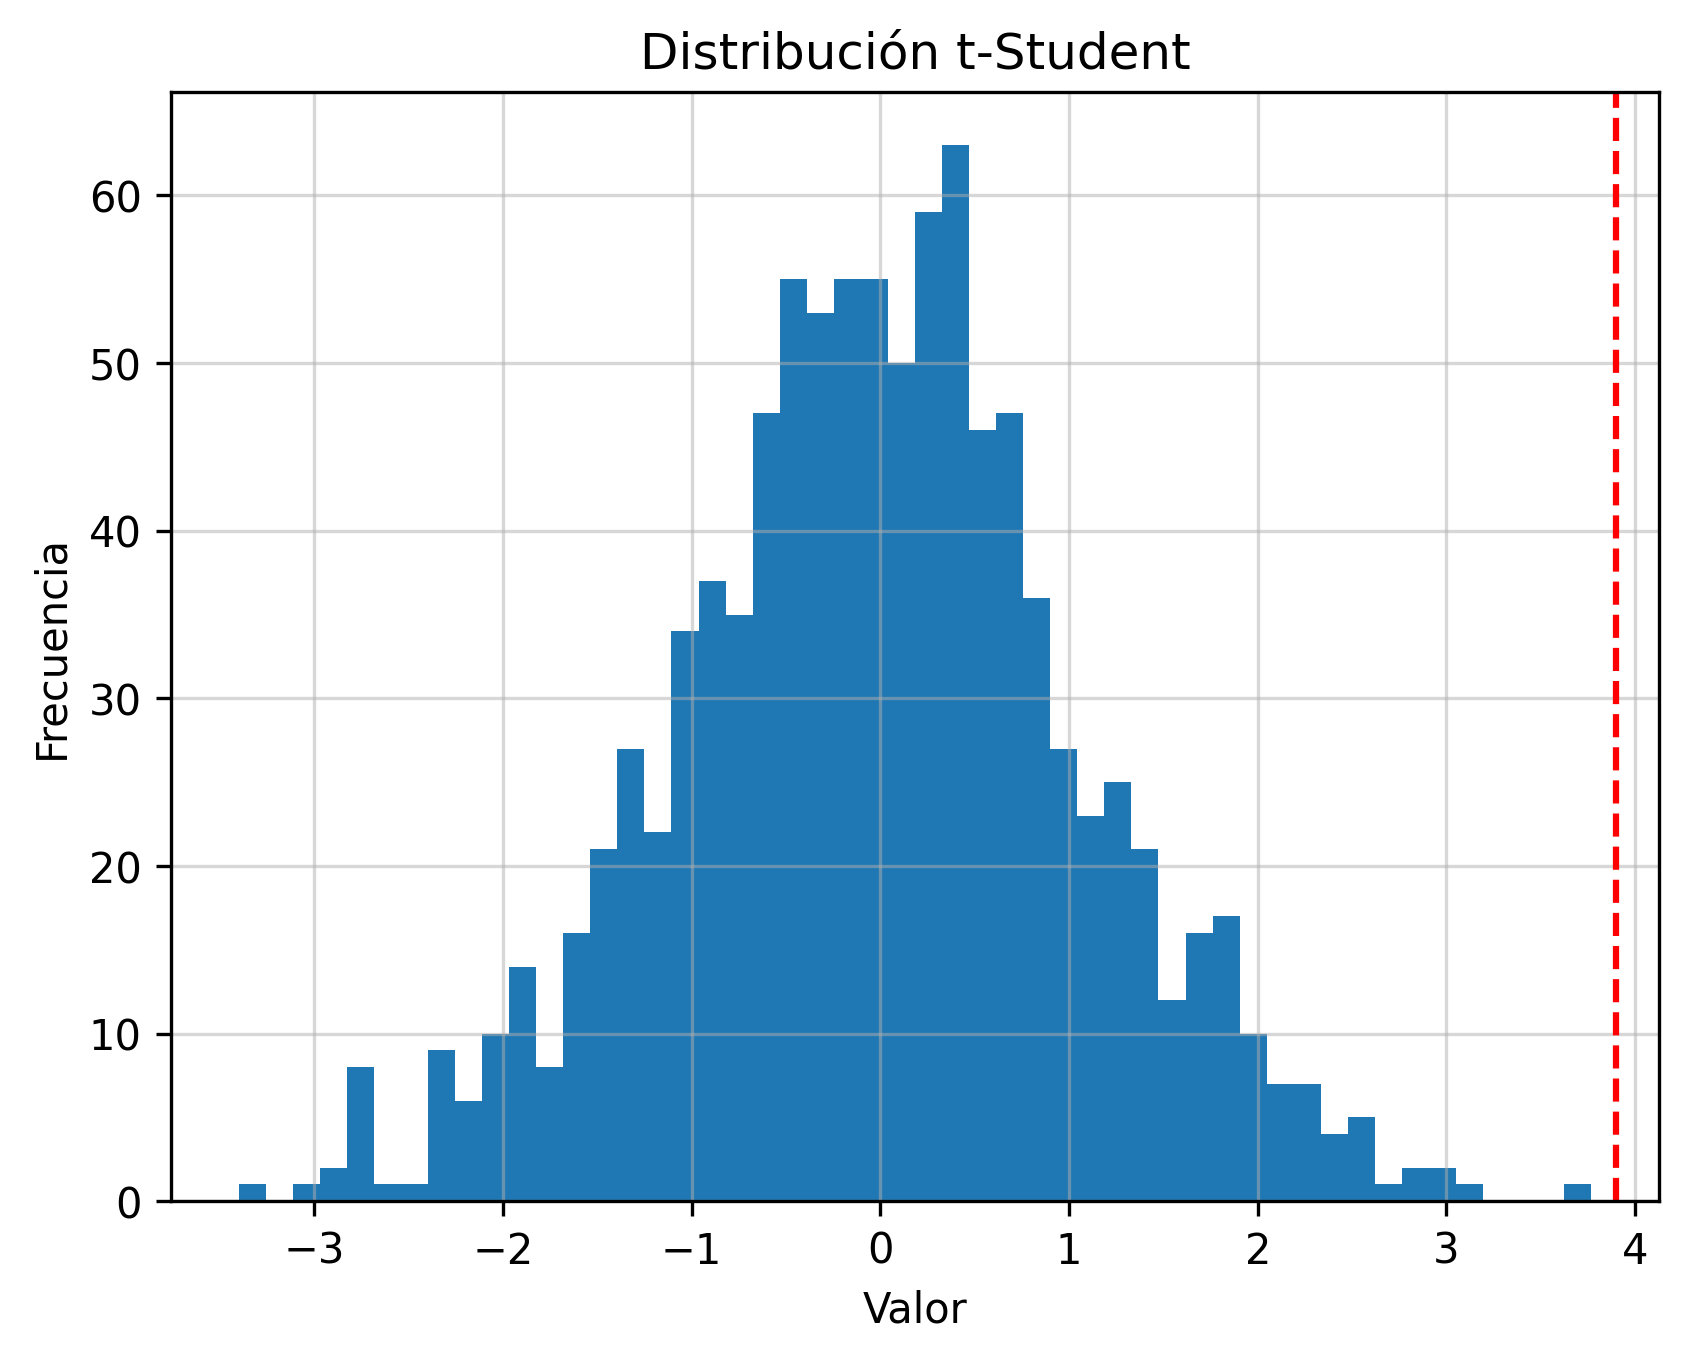

In [3]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = 18
prob = st.t.cdf(3.9, df = df)
print(prob)
rand_num = st.t.rvs(df, size=1_000)

fig, ax = plt.subplots(dpi = 300)
ax.hist(rand_num, bins=50)
ax.set_title('Distribución t-Student')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.grid(True, alpha = 0.5)
ax.axvline(x=3.9, color='red', linestyle='--')
plt.show()

## 3.
Utilizando 5 grados de libertad. ¿Calcule la probabilidad de que un valor sea 1.1?

0.19813859080334623


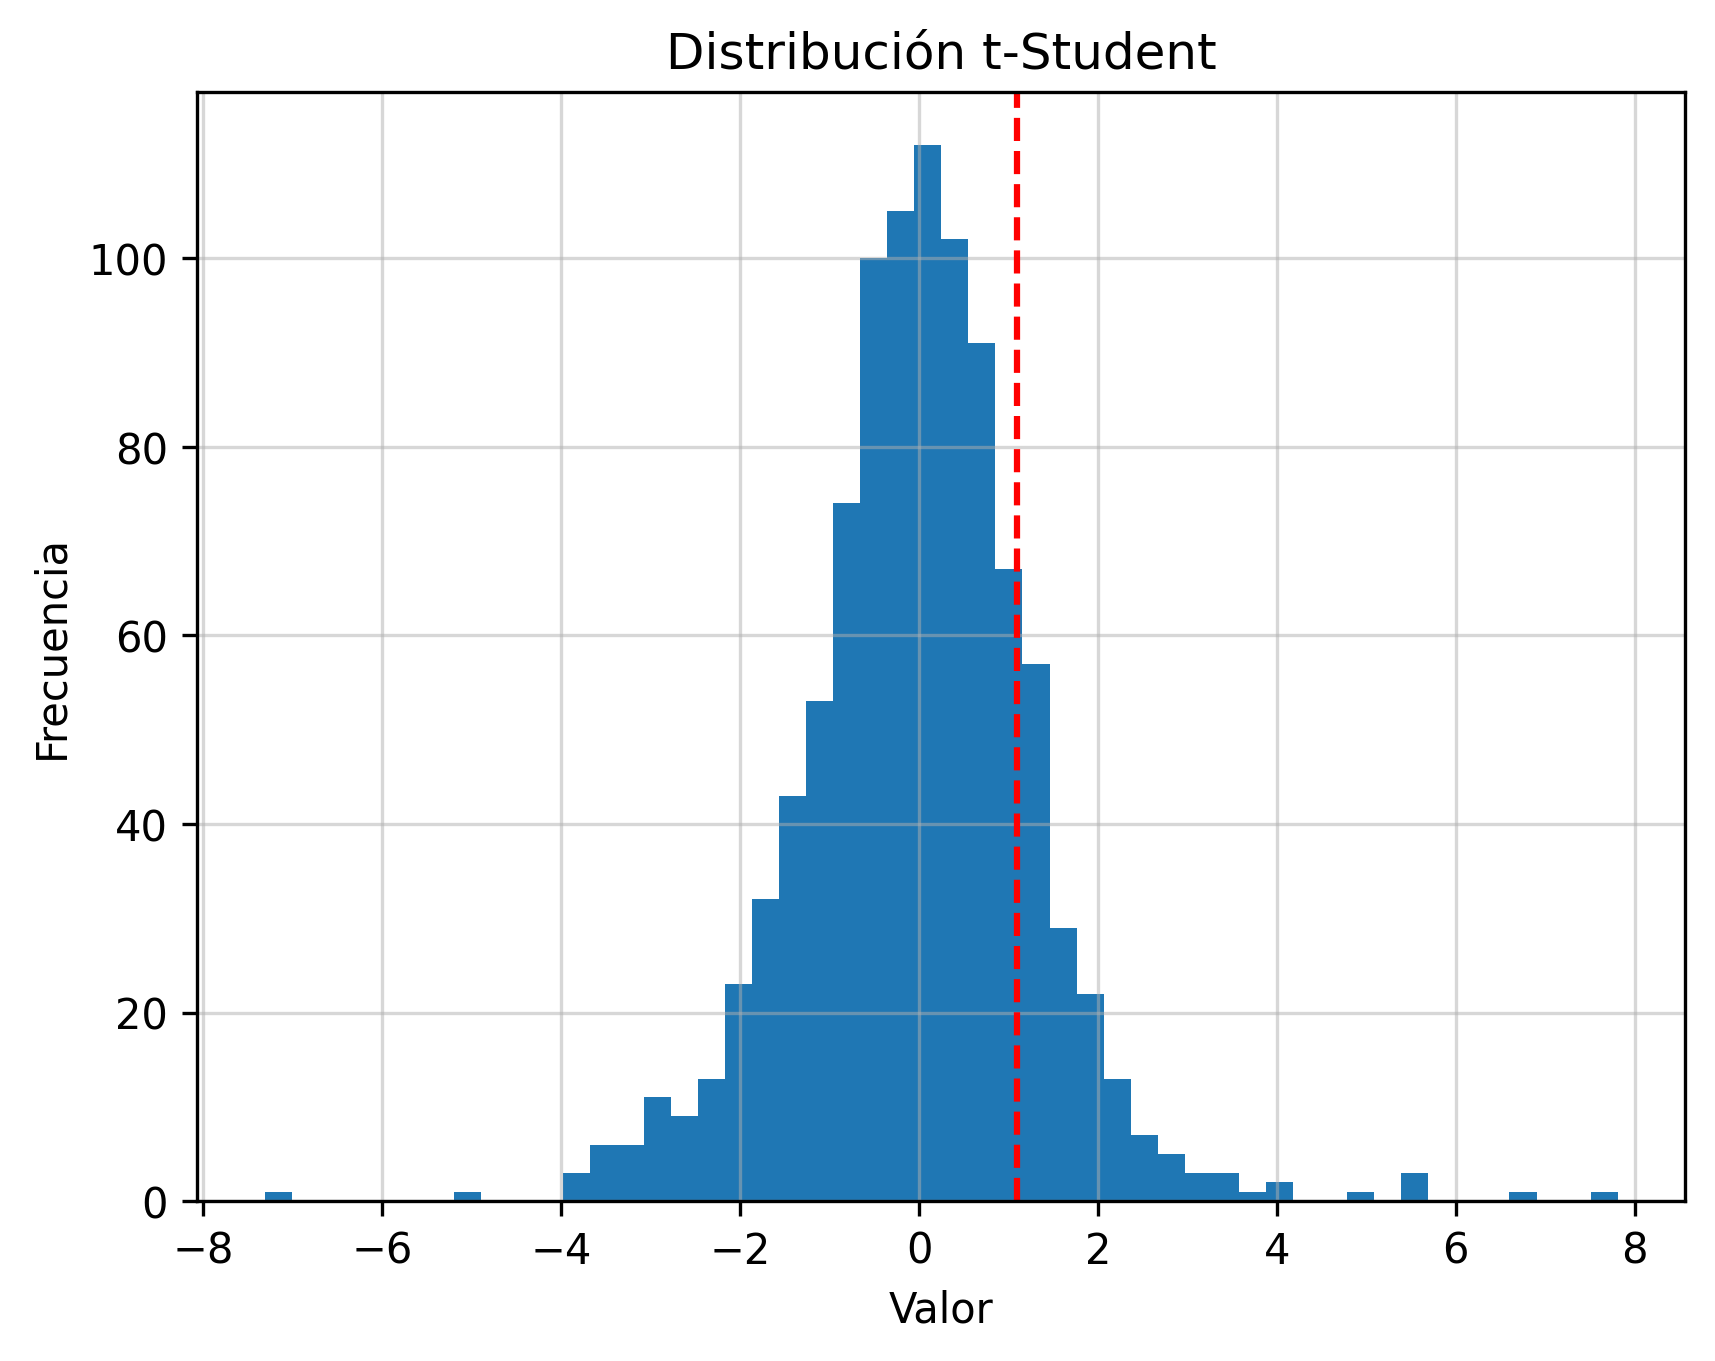

In [4]:

df = 5
prob = st.t.pdf(1.1, df = df)
print(prob)
rand_num = st.t.rvs(df, size=1_000)
fig, ax = plt.subplots(dpi = 300)
ax.hist(rand_num, bins=50)
ax.set_title('Distribución t-Student')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.grid(True, alpha = 0.5)
ax.axvline(x=1.1, color='red', linestyle='--')
plt.show()

## 4.

Utilizando 12 grados de libertad. ¿Calcule el intervalo de confianza de 97.5\% de confianza para un t-crítico definido por esta probabilidad?

---
Respuesta:

$$
\alpha = 1 - 0.975 = 0.025
$$
Ahora debemos calcular $t_{\alpha/2, n-1}$

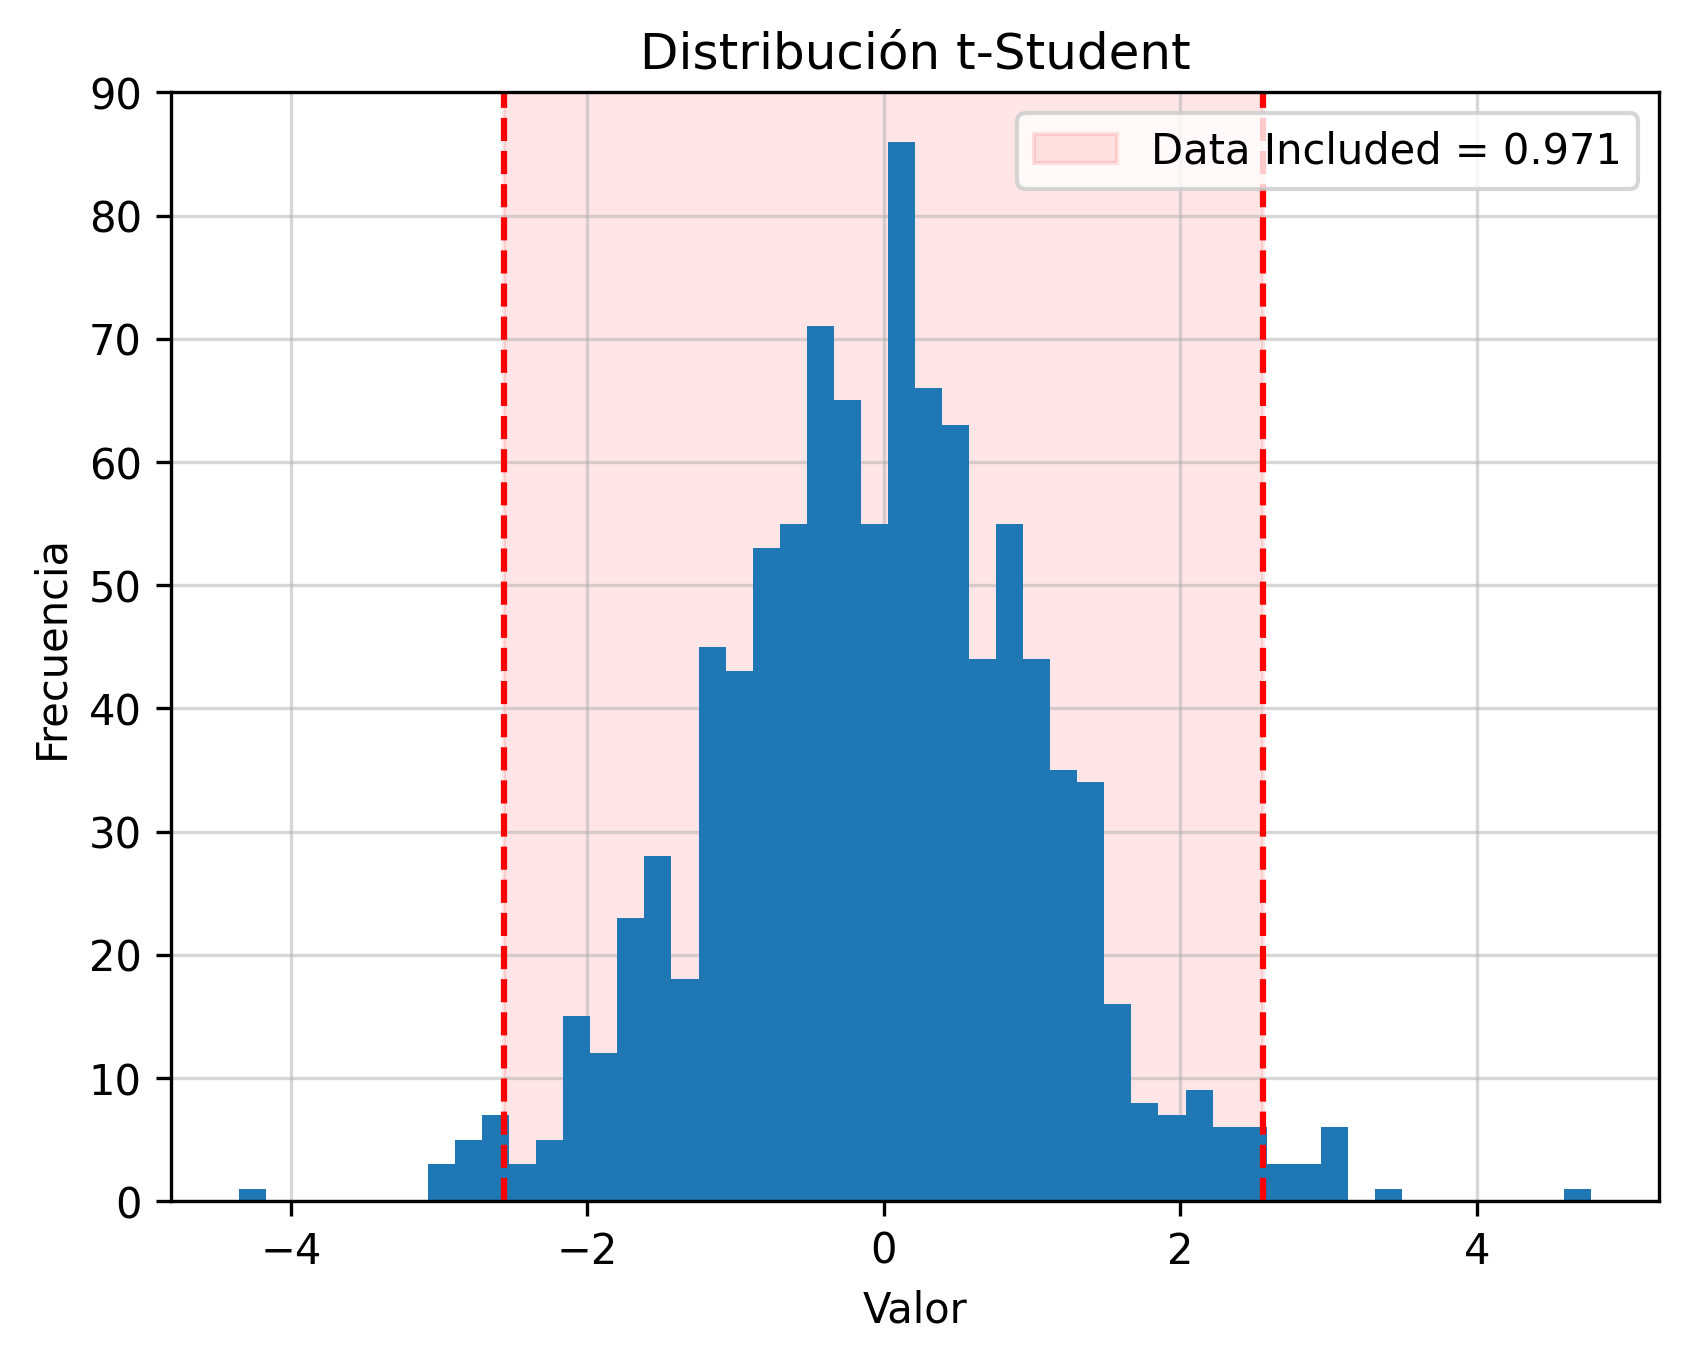

In [5]:
np.random.seed(42)
alpha = 0.025
df = 12
t_ci_sup = st.t.ppf(1-alpha/2, df)
t_ci_inf = st.t.ppf(alpha/2, df)

rand_num = st.t.rvs(df, size=1_000)
fig, ax = plt.subplots(dpi = 300)

proportion = np.mean((rand_num < t_ci_sup) & (rand_num > t_ci_inf))

ax.hist(rand_num, bins=50, zorder = 2)
ax.set_title('Distribución t-Student')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.grid(True, alpha = 0.5)
ax.axvline(x=t_ci_sup, color='red', linestyle='--')
ax.axvline(x=t_ci_inf, color='red', linestyle='--')
ax.fill_between([t_ci_inf, t_ci_sup], [90, 90], alpha=0.1, color='red', zorder = 1,
                label = f'Data Included = {proportion}')
ax.legend(loc='upper right')
ax.set_ylim(0, 90)
plt.show()
plt.show()


## 5.

Verifique como se comporta la distribución de probabilidad a medida que aumentan los grados de libertad. ¿Cómo se compara la distribución t-Student con una distribución normal a medida que aumentan los grados de libertad?

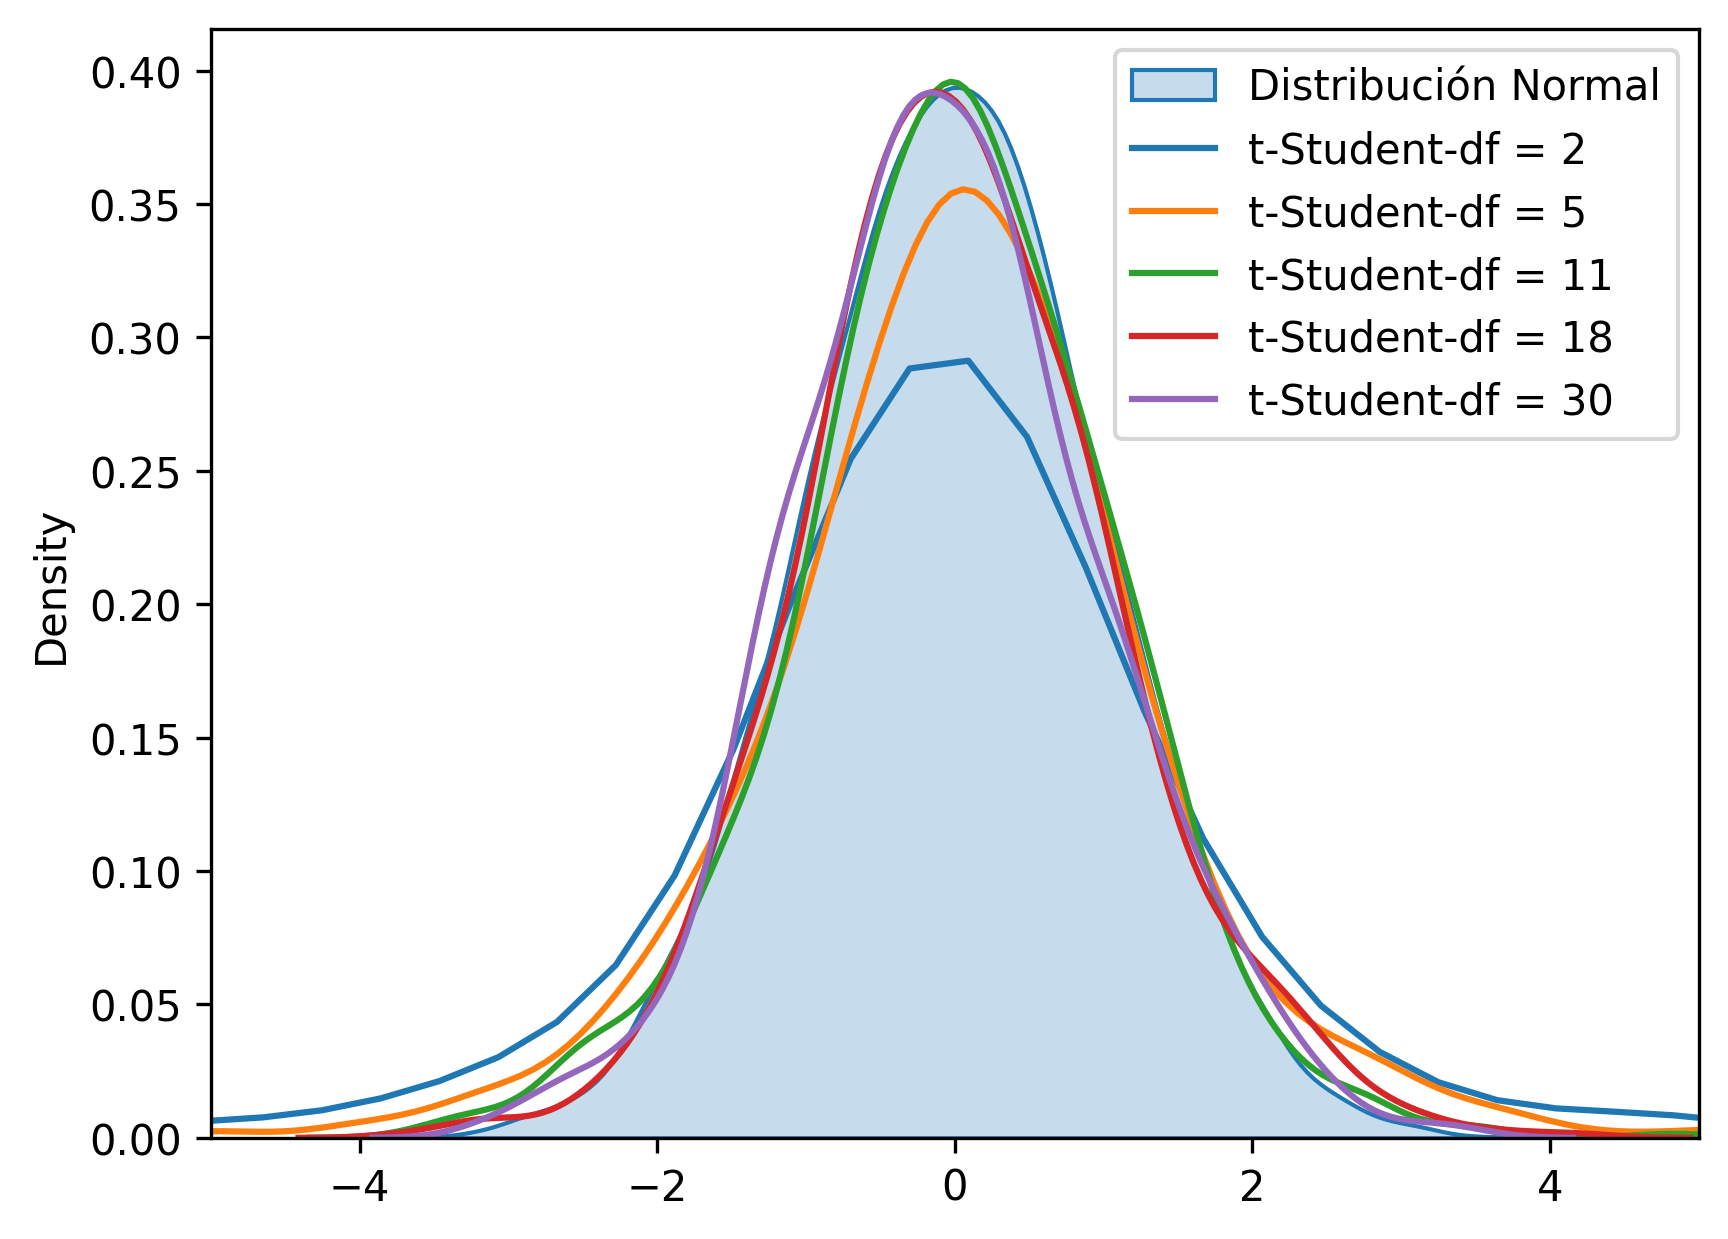

In [6]:
np.random.seed(42)
df_array = [2,5,11,18,30]
fig, ax = plt.subplots(dpi = 300)
num_normal = np.random.normal(size=10_000)
sns.kdeplot(num_normal, ax=ax, label='Distribución Normal', fill=True)
for i in df_array:
    t_student = st.t.rvs(i, size=1_000)
    sns.kdeplot(t_student, ax=ax, label=f't-Student-df = {i}', fill=False)
ax.set_xlim(-5,5)
ax.legend(loc='upper right')
plt.show()



Podemos ver como la distribución t-Student a medida que se incrementan los grados de libertad, más esta se acerca a una distribución normal.

# Royal Gala 2.0
Al Viejo MacDonald le gustó el trabajo que realizó previamente y le gustaría que realizara otros análisis. Recordemos que los datos fueron recolectados de la siguinte forma: De cada huerto (1 huerto = 1 muestra), se seleccionaron 5 árboles al azar, y de cada árbol se tomaron 20 manzanas de tres secciones distintas de árbol (parte alta, media y baja de la copa), esto para una temporada. Además, según internet, el peso promedio de una manzana es de 149 g (otras fuentas clasifican a los tamaños como grande, mediano y pequeño, con pesos de 215 g, 169 g y 120 g, respectivamente), y una desviación estándar de 28 g.

## 1.
El vecino del Viejo MacDonald no quedo conforme con su análisis anterior. Sabiendo que el promedio de su huerto es de 150 g, considerando que de su huerto se obtuvieron 30 manzanas:


### a.

Realice un test de hipótesis y calcule la probabilidad de cometer un error del tipo I y tipo II. ¿Qué se puede concluir al respecto?

---
Respuesta:

Debido a que conocemos la desviación estándar poblacional ($\sigma = 28$) podemos realizar un z-test.

$H_0: \mu = \mu_0$

$H_a: \mu > \mu_0$

Donde $\mu_0 = 149$

In [7]:
mu = 150
mu0 = 149
sigma = 28
alpha = 0.05
n = 30
# error tipo I
z_stastistic = (mu - mu0)/(sigma/np.sqrt(n))

p_val_g = 1 - st.norm.cdf(z_stastistic) # greater
p_val_2s = 2*(1-st.norm.cdf(np.abs(z_stastistic))) # two-sided

# Error tipo II
delta = mu - mu0
z_alpha2 = st.norm.ppf(1 - 0.05/2)
beta_2s = st.norm.cdf(
    z_alpha2 - (delta * np.sqrt(n)/sigma)
) - st.norm.cdf(
    - z_alpha2 - (delta * np.sqrt(n)/sigma)
)

z_alpha = st.norm.ppf(1 - 0.05)
beta_g = st.norm.cdf(
    z_alpha - (delta * np.sqrt(n)/sigma)
)

print('-------Two-Sided-------')
print(f'p-value (tipo I): {p_val_2s:.2f}')
print(f'beta (tipo II): {beta_2s:.2f}\n')
print('-------One-Sided-------')
print(f'p-value (tipo I): {p_val_g:.2f}')
print(f'beta (tipo II): {beta_g:.2f}')

-------Two-Sided-------
p-value (tipo I): 0.84
beta (tipo II): 0.95

-------One-Sided-------
p-value (tipo I): 0.42
beta (tipo II): 0.93


### b.
Dado los resultados, el vecino le da 30 manzanas más (n = 60) ¿Hay algún cambio en las probabilidades anteriores?

In [8]:
mu = 150
mu0 = 149
sigma = 28
alpha = 0.05
n = 60
# error tipo I
z_stastistic = (mu - mu0)/(sigma/np.sqrt(n))

p_val_g = 1 - st.norm.cdf(z_stastistic) # greater
p_val_2s = 2*(1-st.norm.cdf(np.abs(z_stastistic)))
delta = mu - mu0
z_alpha2 = st.norm.ppf(1 - 0.05/2)

# error del tipo II
beta_2s = st.norm.cdf(
    z_alpha2 - (delta * np.sqrt(n)/sigma)
) - st.norm.cdf(
    - z_alpha2 - (delta * np.sqrt(n)/sigma)
)
z_alpha = st.norm.ppf(1 - 0.05)
beta_g = st.norm.cdf(
    z_alpha - (delta * np.sqrt(n)/sigma)
)

print('-------Two-Sided-------')
print(f'p-value (tipo I): {p_val_2s:.2f}')
print(f'beta (tipo II): {beta_2s:.2f}')
print('-------One-Sided-------')
print(f'p-value (tipo I): {p_val_g:.2f}')
print(f'beta (tipo II): {beta_g:.2f}')

-------Two-Sided-------
p-value (tipo I): 0.78
beta (tipo II): 0.94
-------One-Sided-------
p-value (tipo I): 0.39
beta (tipo II): 0.91


### c.
¿Cuál es la cantidad de manzanas que se deben utilizar para obtener un poder estadístico $(1-\beta)$ de 90\% dada una significancia de $\alpha = 0.05$ y $\delta = 1$?

In [9]:
# utilizando one sided alterative
beta = 1 - 0.9
alpha = 0.05
delta = 1

z_alpha = st.norm.ppf(alpha)
z_beta = st.norm.ppf(beta)
sigma = 28

n = (((z_alpha + z_beta)**2 ) * sigma**2)/(delta**2)
print(f'n = {n:.2f}')

n = 6714.06


### d.

No conforme con esto, el vecino del Viejo MacDonald quiere un análisis más exhaustivo así que le pide construir la *Operating Characteristic Curve* de su huerto. Construya dicha curva para niveles de significancia $\alpha = 0.1$, $\alpha = 0.05$, $\alpha = 0.01$ y $\alpha = 0.001$.

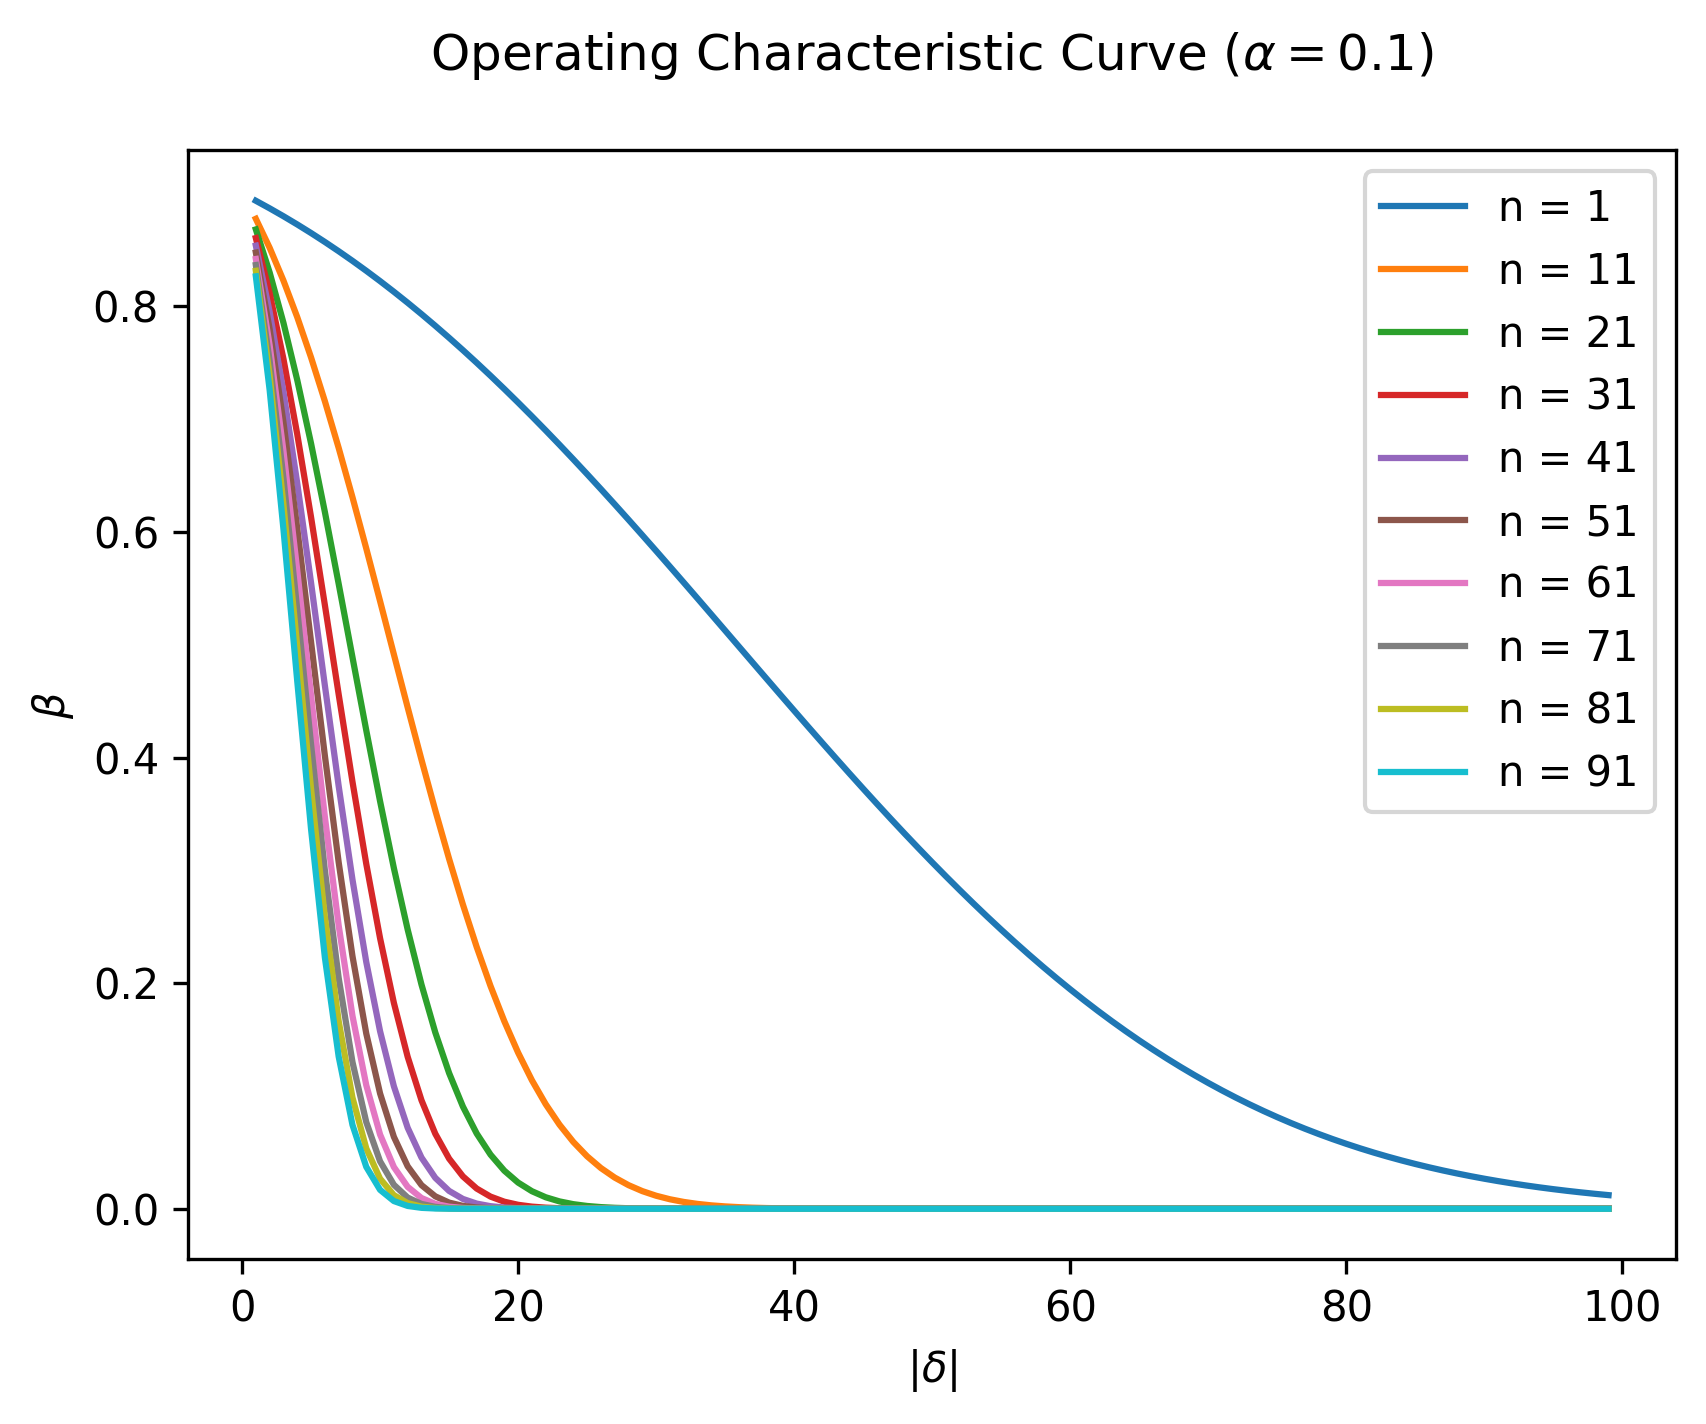

In [10]:
alphas =  0.1

deltas = np.arange(1, 100, 1)
sigma = 28
fig, ax = plt.subplots(dpi = 300)
n_s = np.arange(1, 100, 10)
for n in n_s:
    beta_a = []
    z_alpha = st.norm.ppf(1 - alphas)
    for d in deltas:
        beta_g = st.norm.cdf(
            z_alpha - (d * np.sqrt(n)/sigma)
        )
        beta_a.append(beta_g)

    ax.plot(deltas, beta_a, label = f'n = {n}')
ax.set_xlabel(r'$|\delta|$')
ax.set_ylabel(r'$\beta$')

ax.set_title(r'Operating Characteristic Curve ($\alpha = 0.1$)', y = 1.05)

ax.legend()
plt.show()




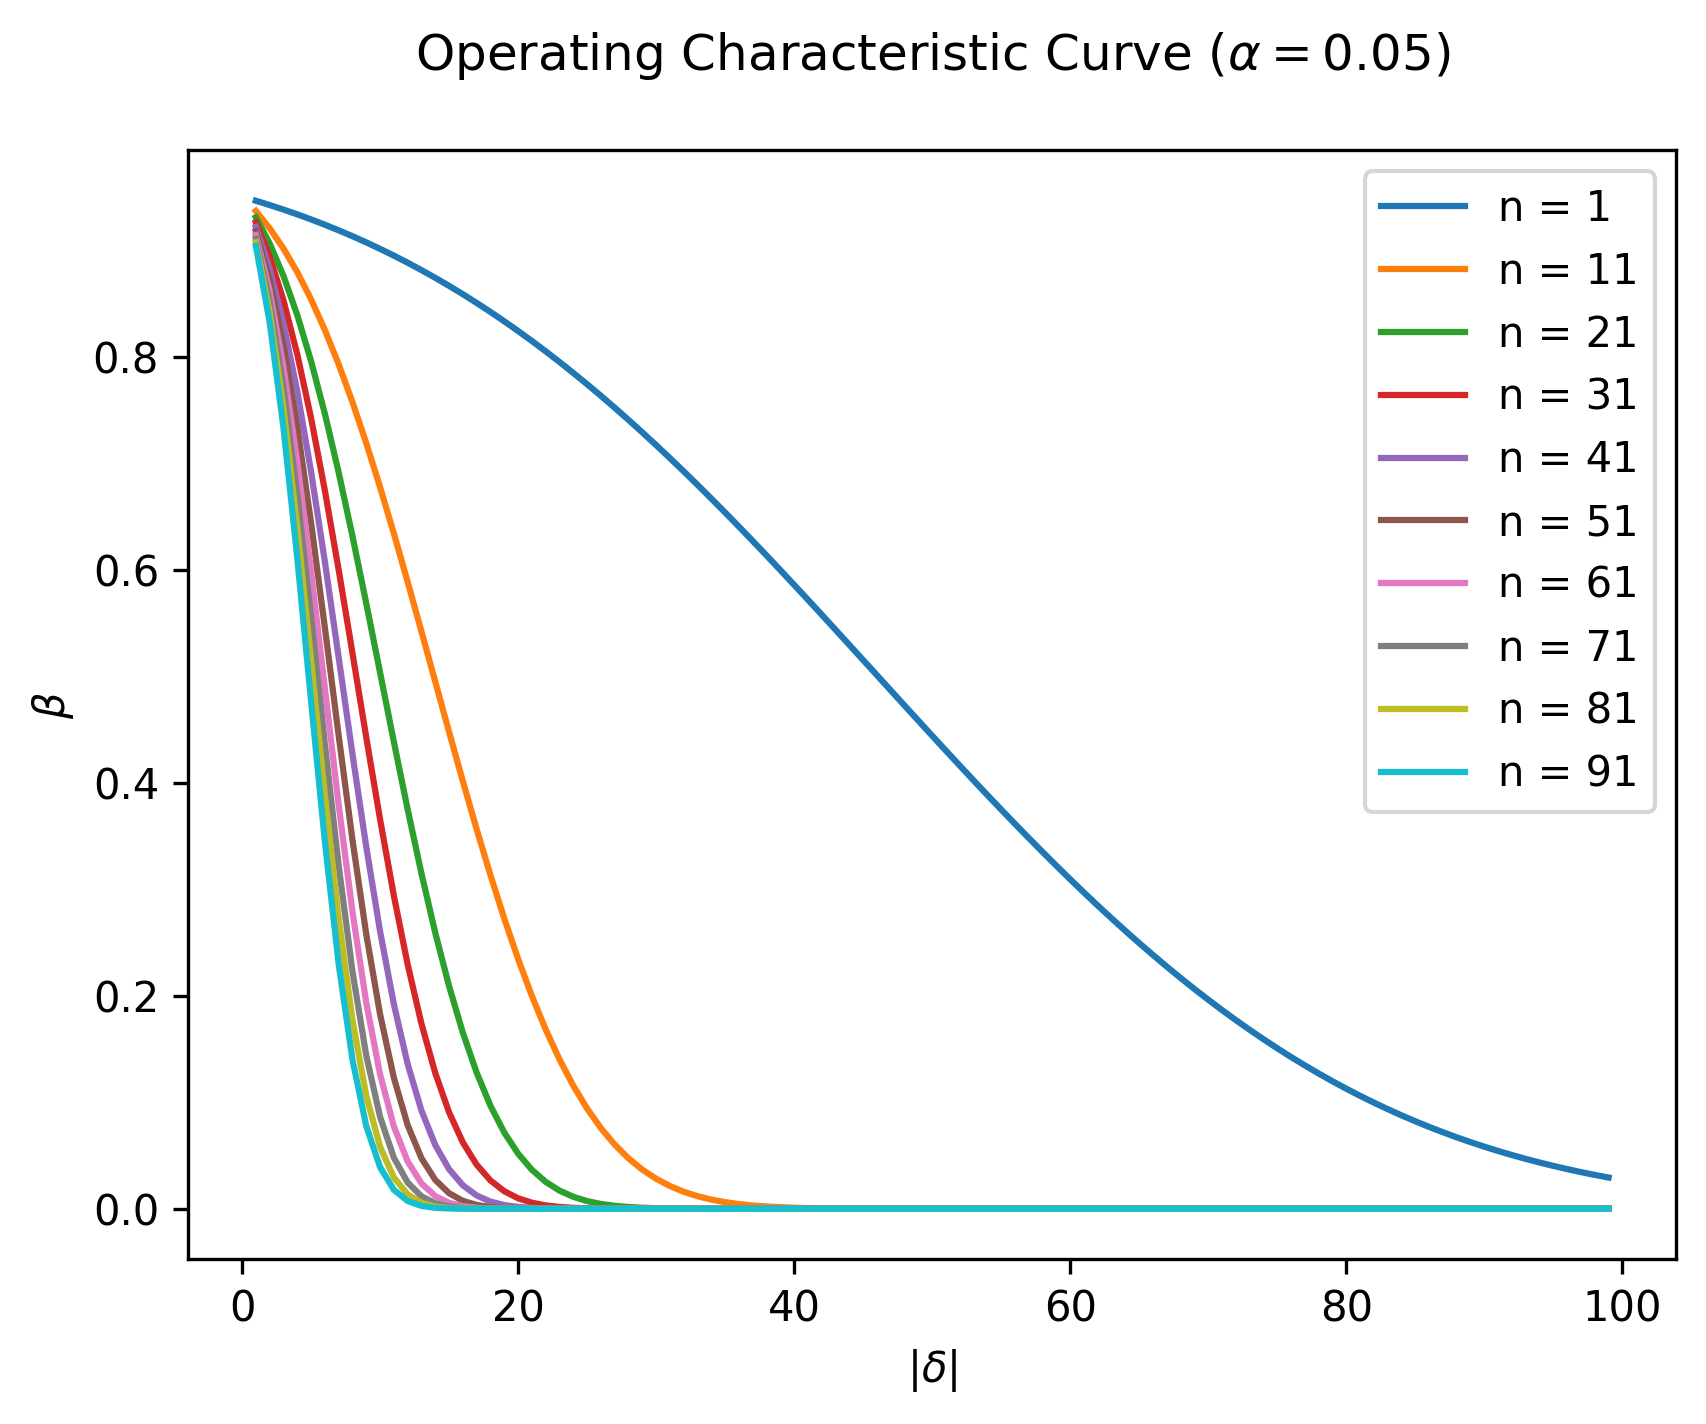

In [11]:
alphas =  0.05

deltas = np.arange(1, 100, 1)
sigma = 28
fig, ax = plt.subplots(dpi = 300)
n_s = np.arange(1, 100, 10)
for n in n_s:
    beta_a = []
    z_alpha = st.norm.ppf(1 - alphas)
    for d in deltas:
        beta_g = st.norm.cdf(
            z_alpha - (d * np.sqrt(n)/sigma)
        )
        beta_a.append(beta_g)

    ax.plot(deltas, beta_a, label = f'n = {n}')
ax.set_xlabel(r'$|\delta|$')
ax.set_ylabel(r'$\beta$')

ax.set_title(r'Operating Characteristic Curve ($\alpha = 0.05$)', y = 1.05)

ax.legend()
plt.show()


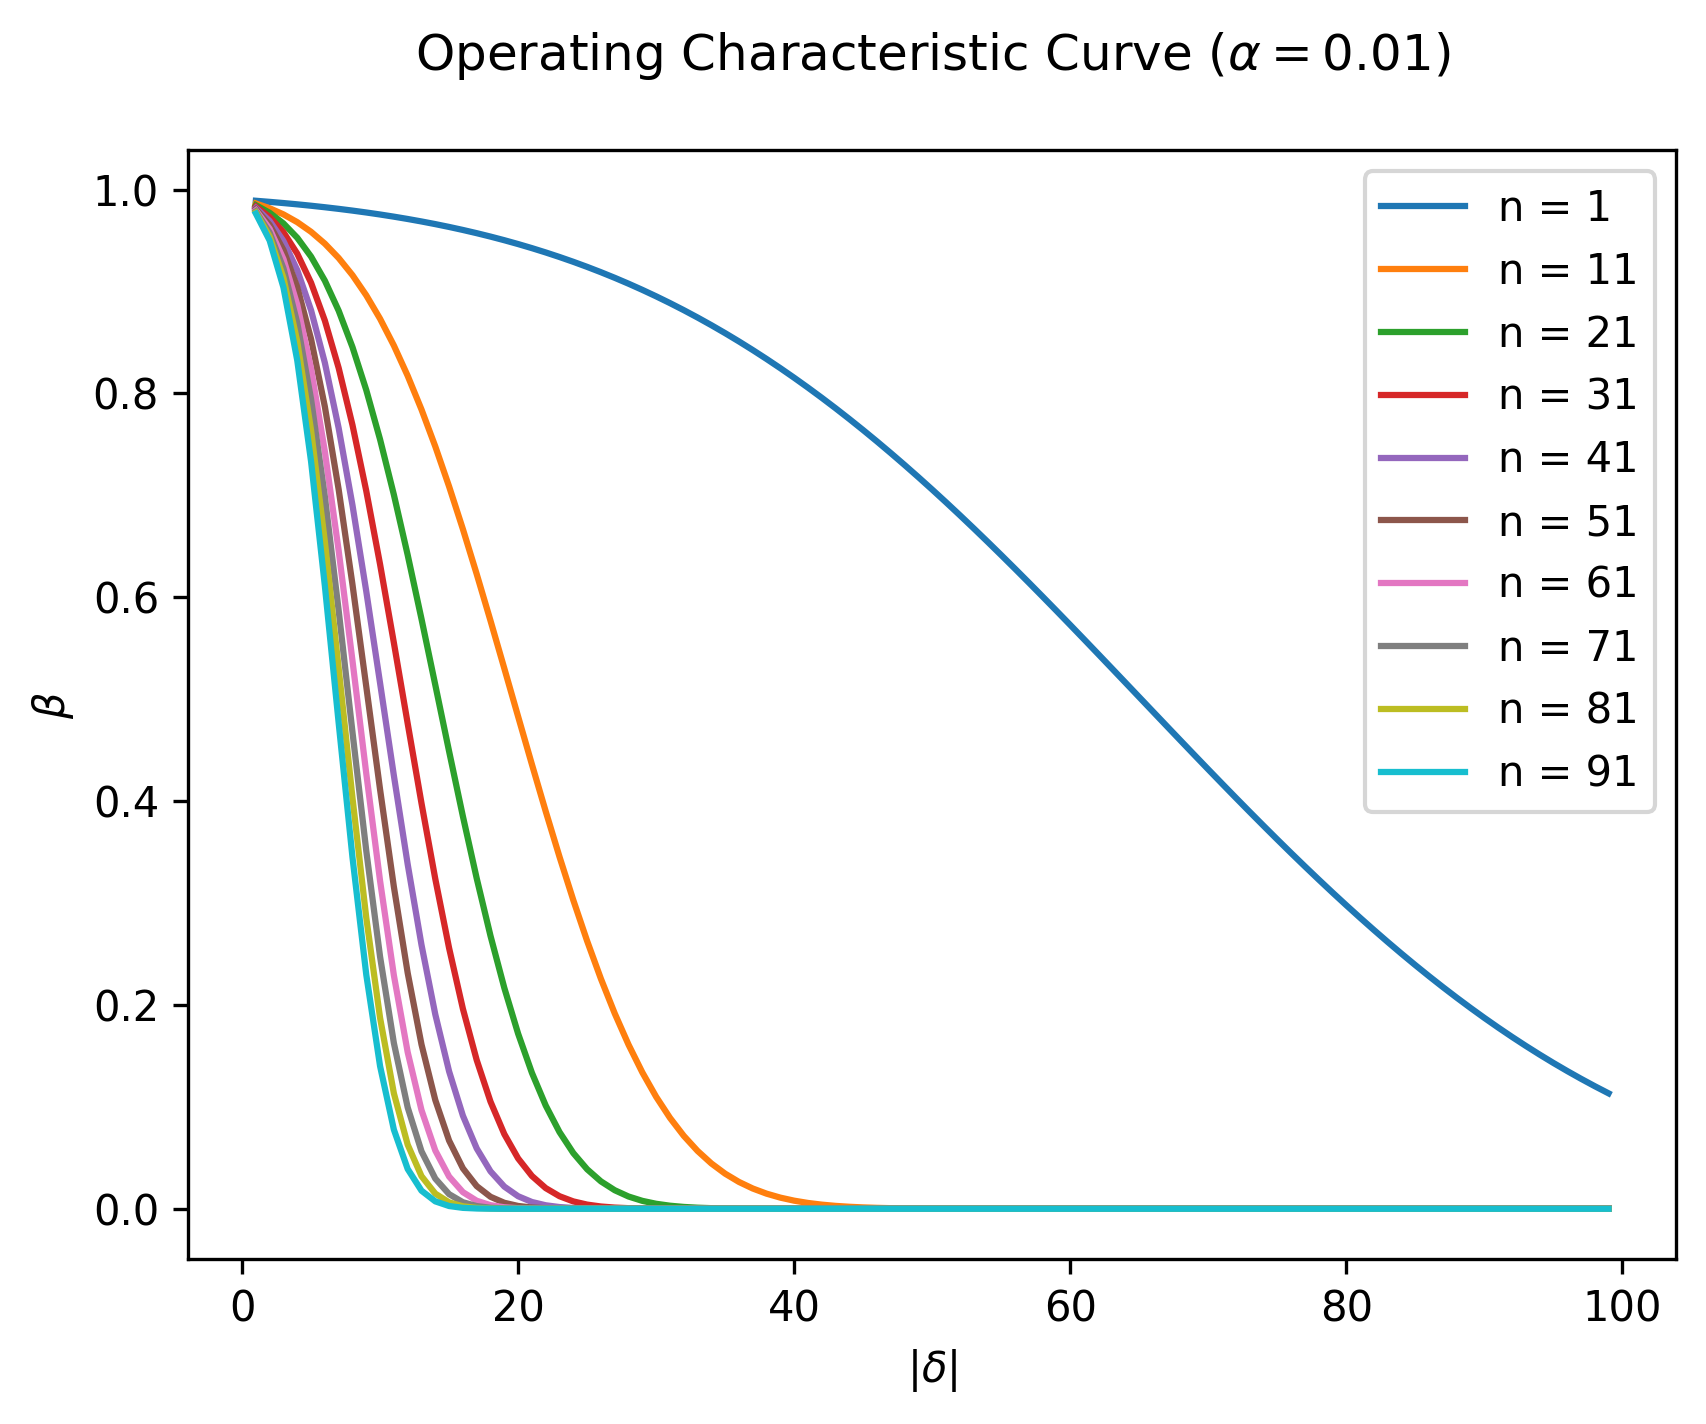

In [12]:
alphas =  0.01

deltas = np.arange(1, 100, 1)
sigma = 28
fig, ax = plt.subplots(dpi = 300)
n_s = np.arange(1, 100, 10)
for n in n_s:
    beta_a = []
    z_alpha = st.norm.ppf(1 - alphas)
    for d in deltas:
        beta_g = st.norm.cdf(
            z_alpha - (d * np.sqrt(n)/sigma)
        )
        beta_a.append(beta_g)

    ax.plot(deltas, beta_a, label = f'n = {n}')
ax.set_xlabel(r'$|\delta|$')
ax.set_ylabel(r'$\beta$')

ax.set_title(r'Operating Characteristic Curve ($\alpha = 0.01$)', y = 1.05)

ax.legend()
plt.show()





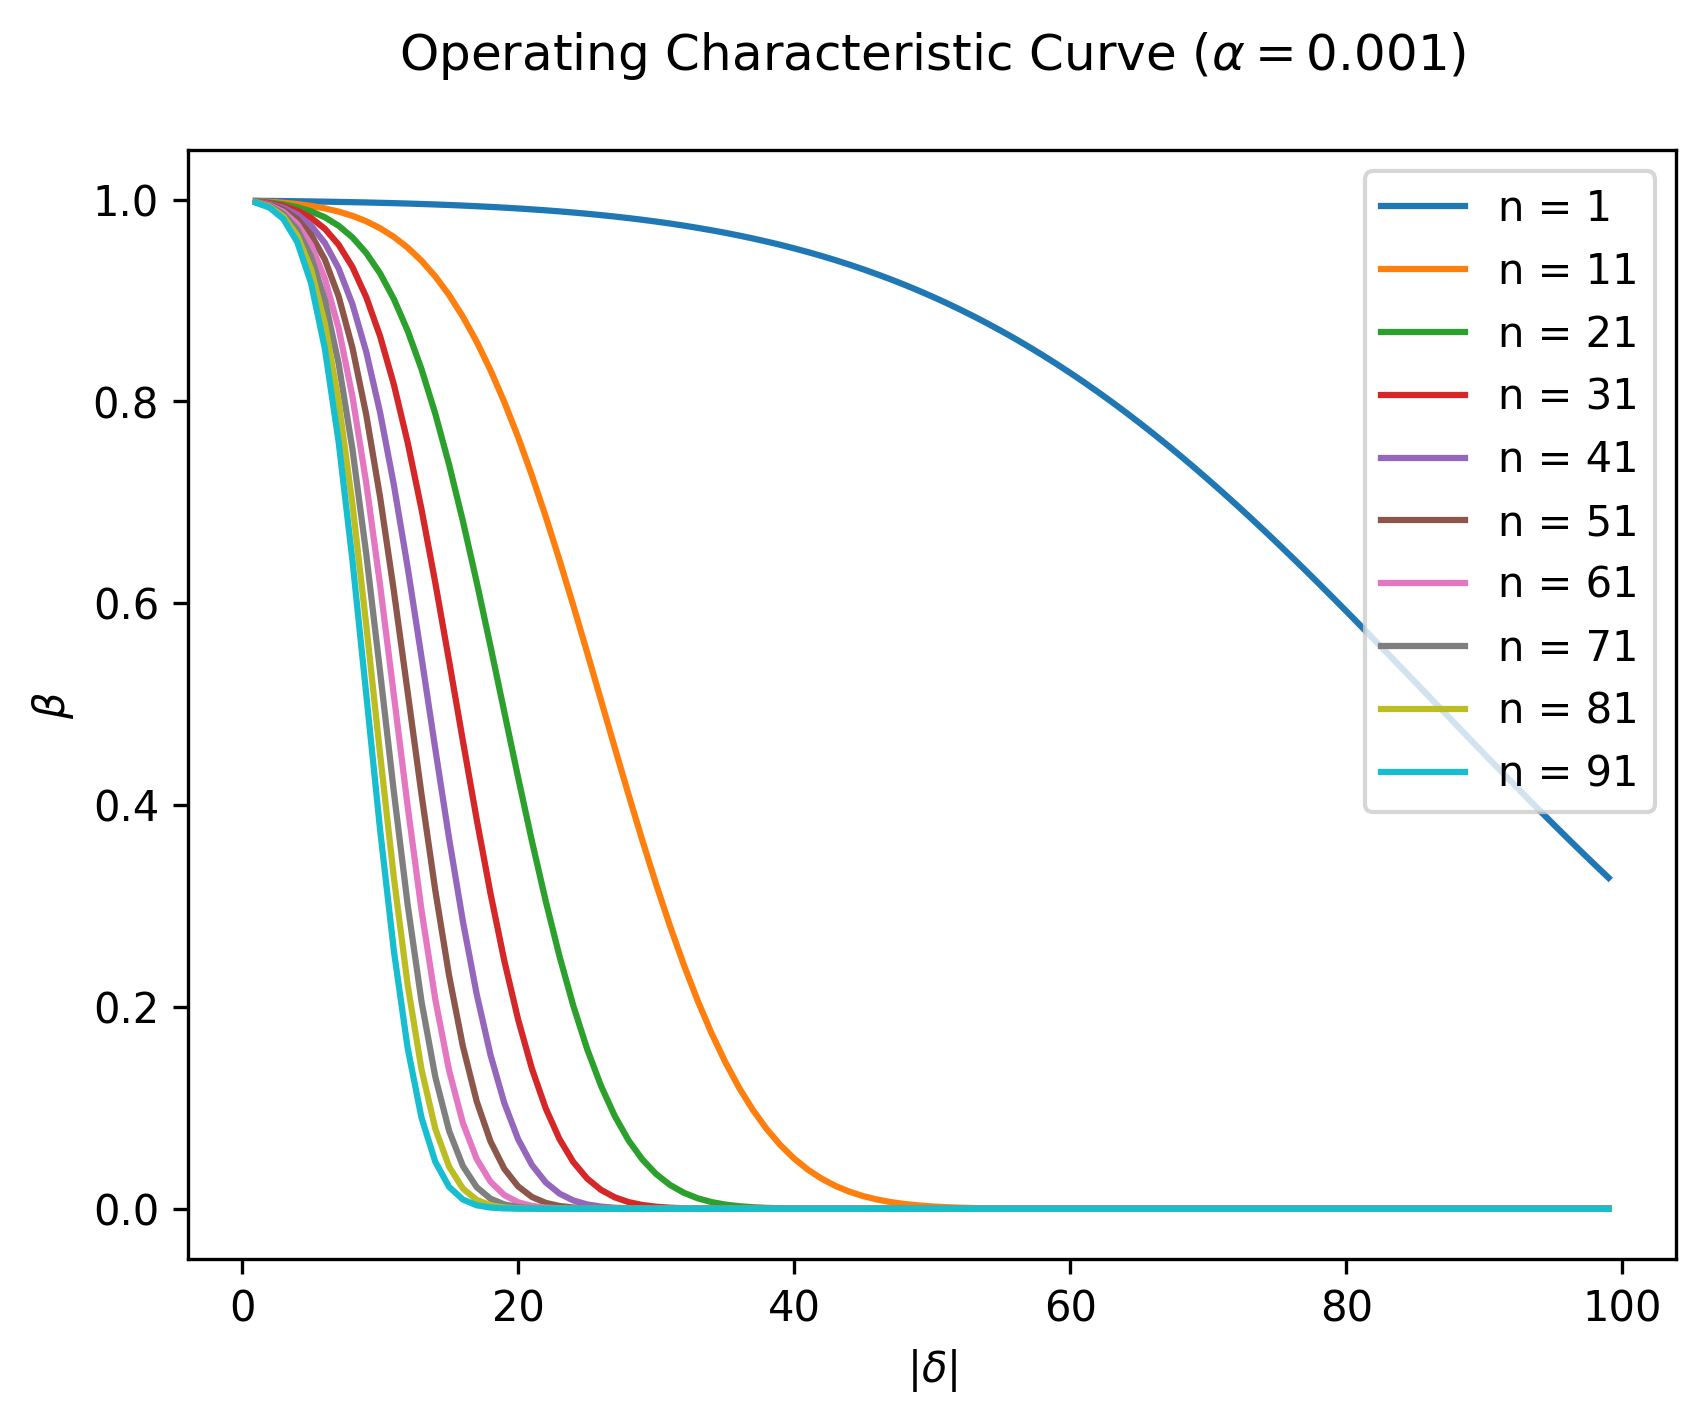

In [13]:
alphas =  0.001

deltas = np.arange(1, 100, 1)
sigma = 28
fig, ax = plt.subplots(dpi = 300)
n_s = np.arange(1, 100, 10)
for n in n_s:
    beta_a = []
    z_alpha = st.norm.ppf(1 - alphas)
    for d in deltas:
        beta_g = st.norm.cdf(
            z_alpha - (d * np.sqrt(n)/sigma)
        )
        beta_a.append(beta_g)

    ax.plot(deltas, beta_a, label = f'n = {n}')
ax.set_xlabel(r'$|\delta|$')
ax.set_ylabel(r'$\beta$')

ax.set_title(r'Operating Characteristic Curve ($\alpha = 0.001$)', y = 1.05)

ax.legend(loc = 'upper right')
plt.show()






## 2.
Después de su análisis,  una tormenta afectó a los diferentes cultivos de la zona. Los granjeros de la zona le solicitan que analice sus cultivos para evaluar si se mantienen por sobre el promedio poblacional. Gracias a la catástrofe, la desviación estándar de la población cambió -y no la sabe. Realice iterativamente test estadísticos para evaluar los cambios.

Calcule el estadístico de su prueba, el valor-p, intervalos de confianza y si puede o no rechazar la hipótesis nula. Sus datos son:



```
gala = [[150, 12, 31],[140, 21, 43], [155, 23, 12], [145, 23, 31],
[122,50, 13], [200, 31, 12], [144, 12, 21]]
```

Considere que la primera entrada es la media de la muestra, la segunda es la desviación
estándar y la tercera es la cantidad de datos en la muestra. Antes de empezar, considere qué
test debe utilizar.



In [14]:
gala = [[150, 12, 31],[140, 21, 43], [155, 23, 12], [145, 23, 31],
[122,50, 13], [200, 31, 12], [144, 12, 21]]

medias = [x[0] for x in gala]
desviaciones = [x[1] for x in gala]
n = [x[2] for x in gala]

# Hipótesis
# H0: media = 149
# Ha: media > 149
data_result = pd.DataFrame(columns = ['Media', 'Std', 'n', 't0',
                                      'valor-p','CI_Low','CI_High', 'Result'])

for i in range(len(gala)):
    mu = medias[i]
    mu0 = 149
    sigma = desviaciones[i]
    alpha = 0.05
    n_i = n[i]

    t_stat = (mu - mu0)/(sigma/np.sqrt(n_i))
    p_val = 1 - st.t.cdf(t_stat, df = n_i-1)
    t_alpha2 = st.t.ppf(1 - 0.05/2, df = n_i-1)
    ci_low = mu - t_alpha2 * (sigma/np.sqrt(n_i))
    ci_high = mu + t_alpha2 * (sigma/np.sqrt(n_i))

    if p_val < alpha:
        result = 'Rechazar H0'
    else:
        result = 'No rechazar H0'
    data_result.loc[i] = [mu, sigma, n_i, t_stat, p_val, ci_low, ci_high, result]
pd.options.display.float_format = '{:.4f}'.format
data_result




,Media,Std,n,t0,valor-p,CI_Low,CI_High,Result
0,150,12,31,0.4640,0.3230,145.5984,154.4016,No rechazar H0
1,140,21,43,-2.8103,0.9963,133.5372,146.4628,No rechazar H0
2,155,23,12,0.9037,0.1928,140.3865,169.6135,No rechazar H0
3,145,23,31,-0.9683,0.8297,136.5635,153.4365,No rechazar H0
4,122,50,13,-1.9470,0.9623,91.7853,152.2147,No rechazar H0
5,200,31,12,5.6990,0.0001,180.3035,219.6965,Rechazar H0
6,144,12,21,-1.9094,0.9647,138.5377,149.4623,No rechazar H0


# Aplicación Computacional

Compare las siguientes muestras. Establezca qué test estadístico debe utilizar y responda.

## Datos 1



```
np.random.seed(42)
    data1 = np.random.normal(loc = 10, scale = 21, size = 50)
    data2 = np.random.normal(loc = 12, scale = 12, size = 50)
```



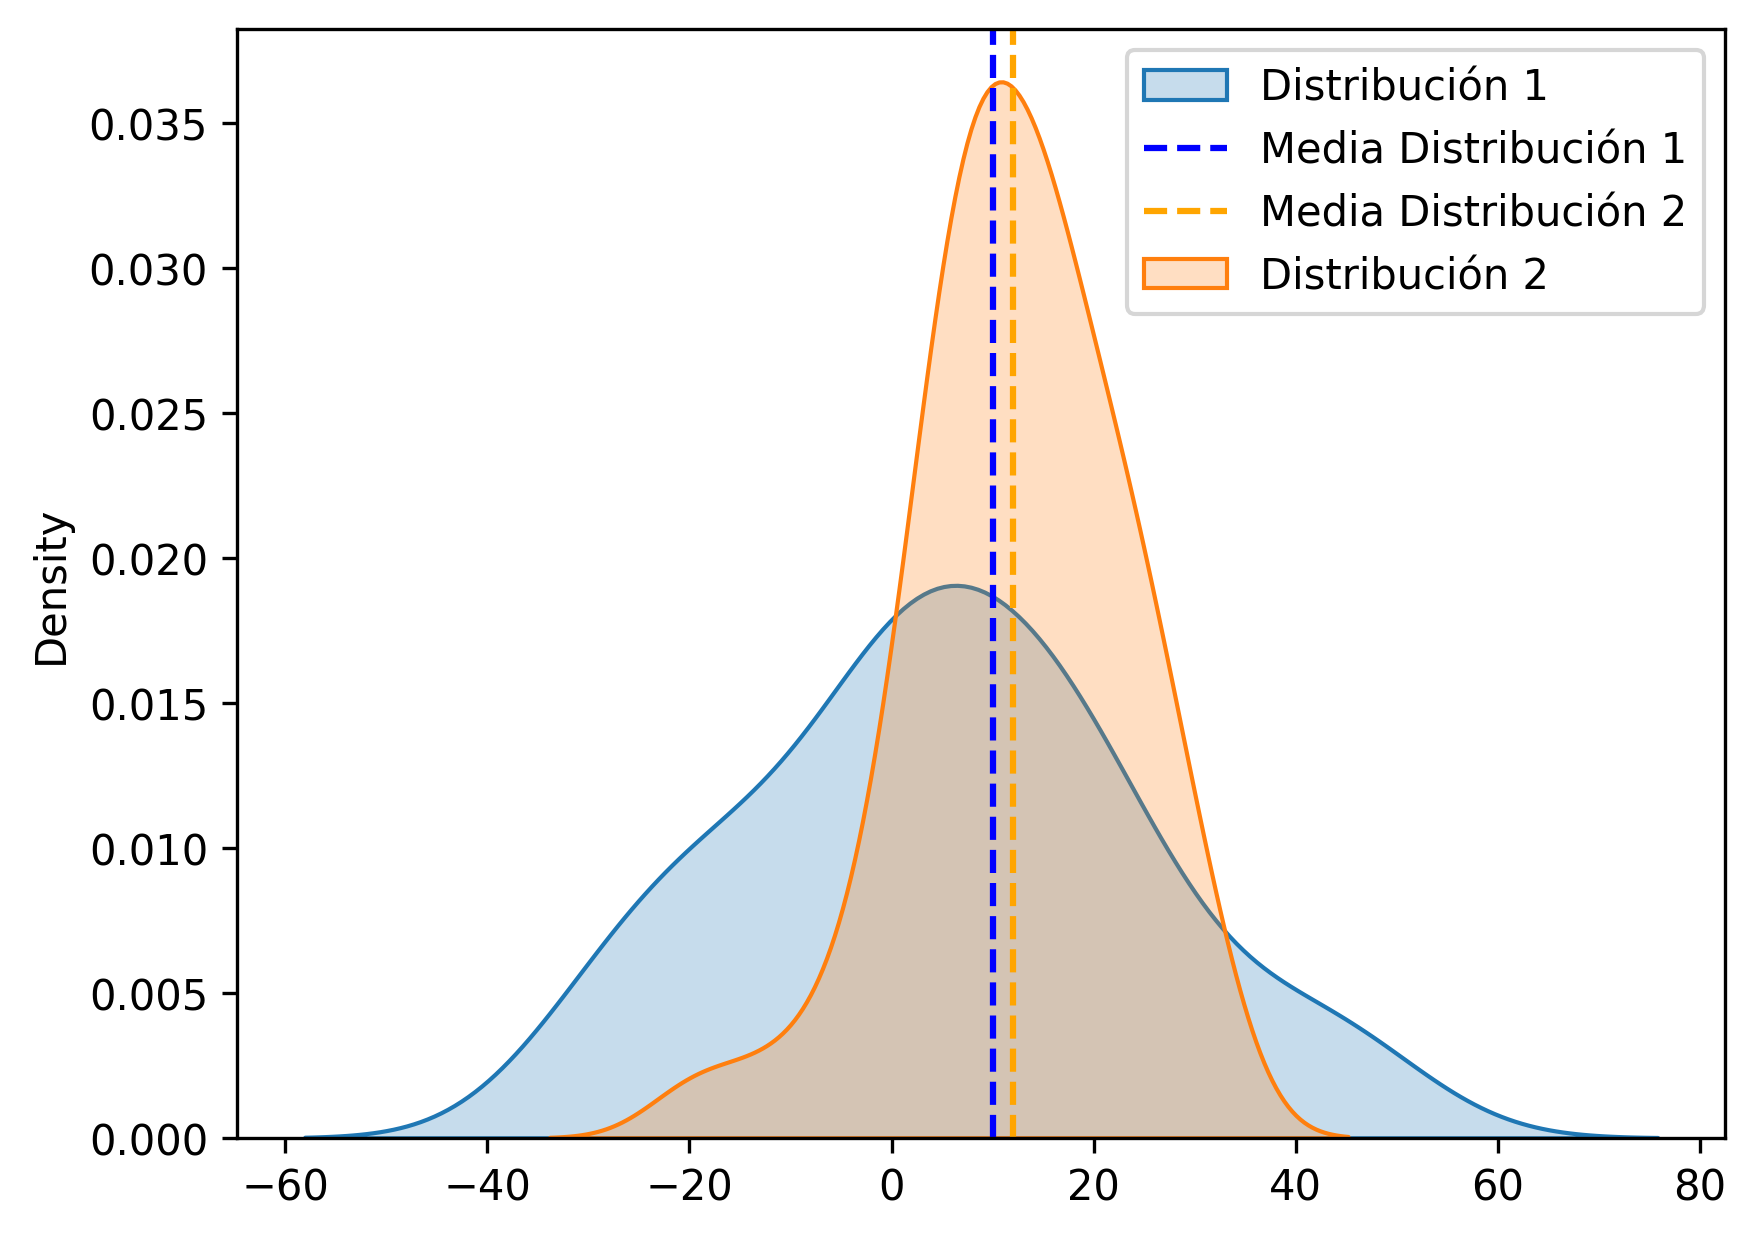

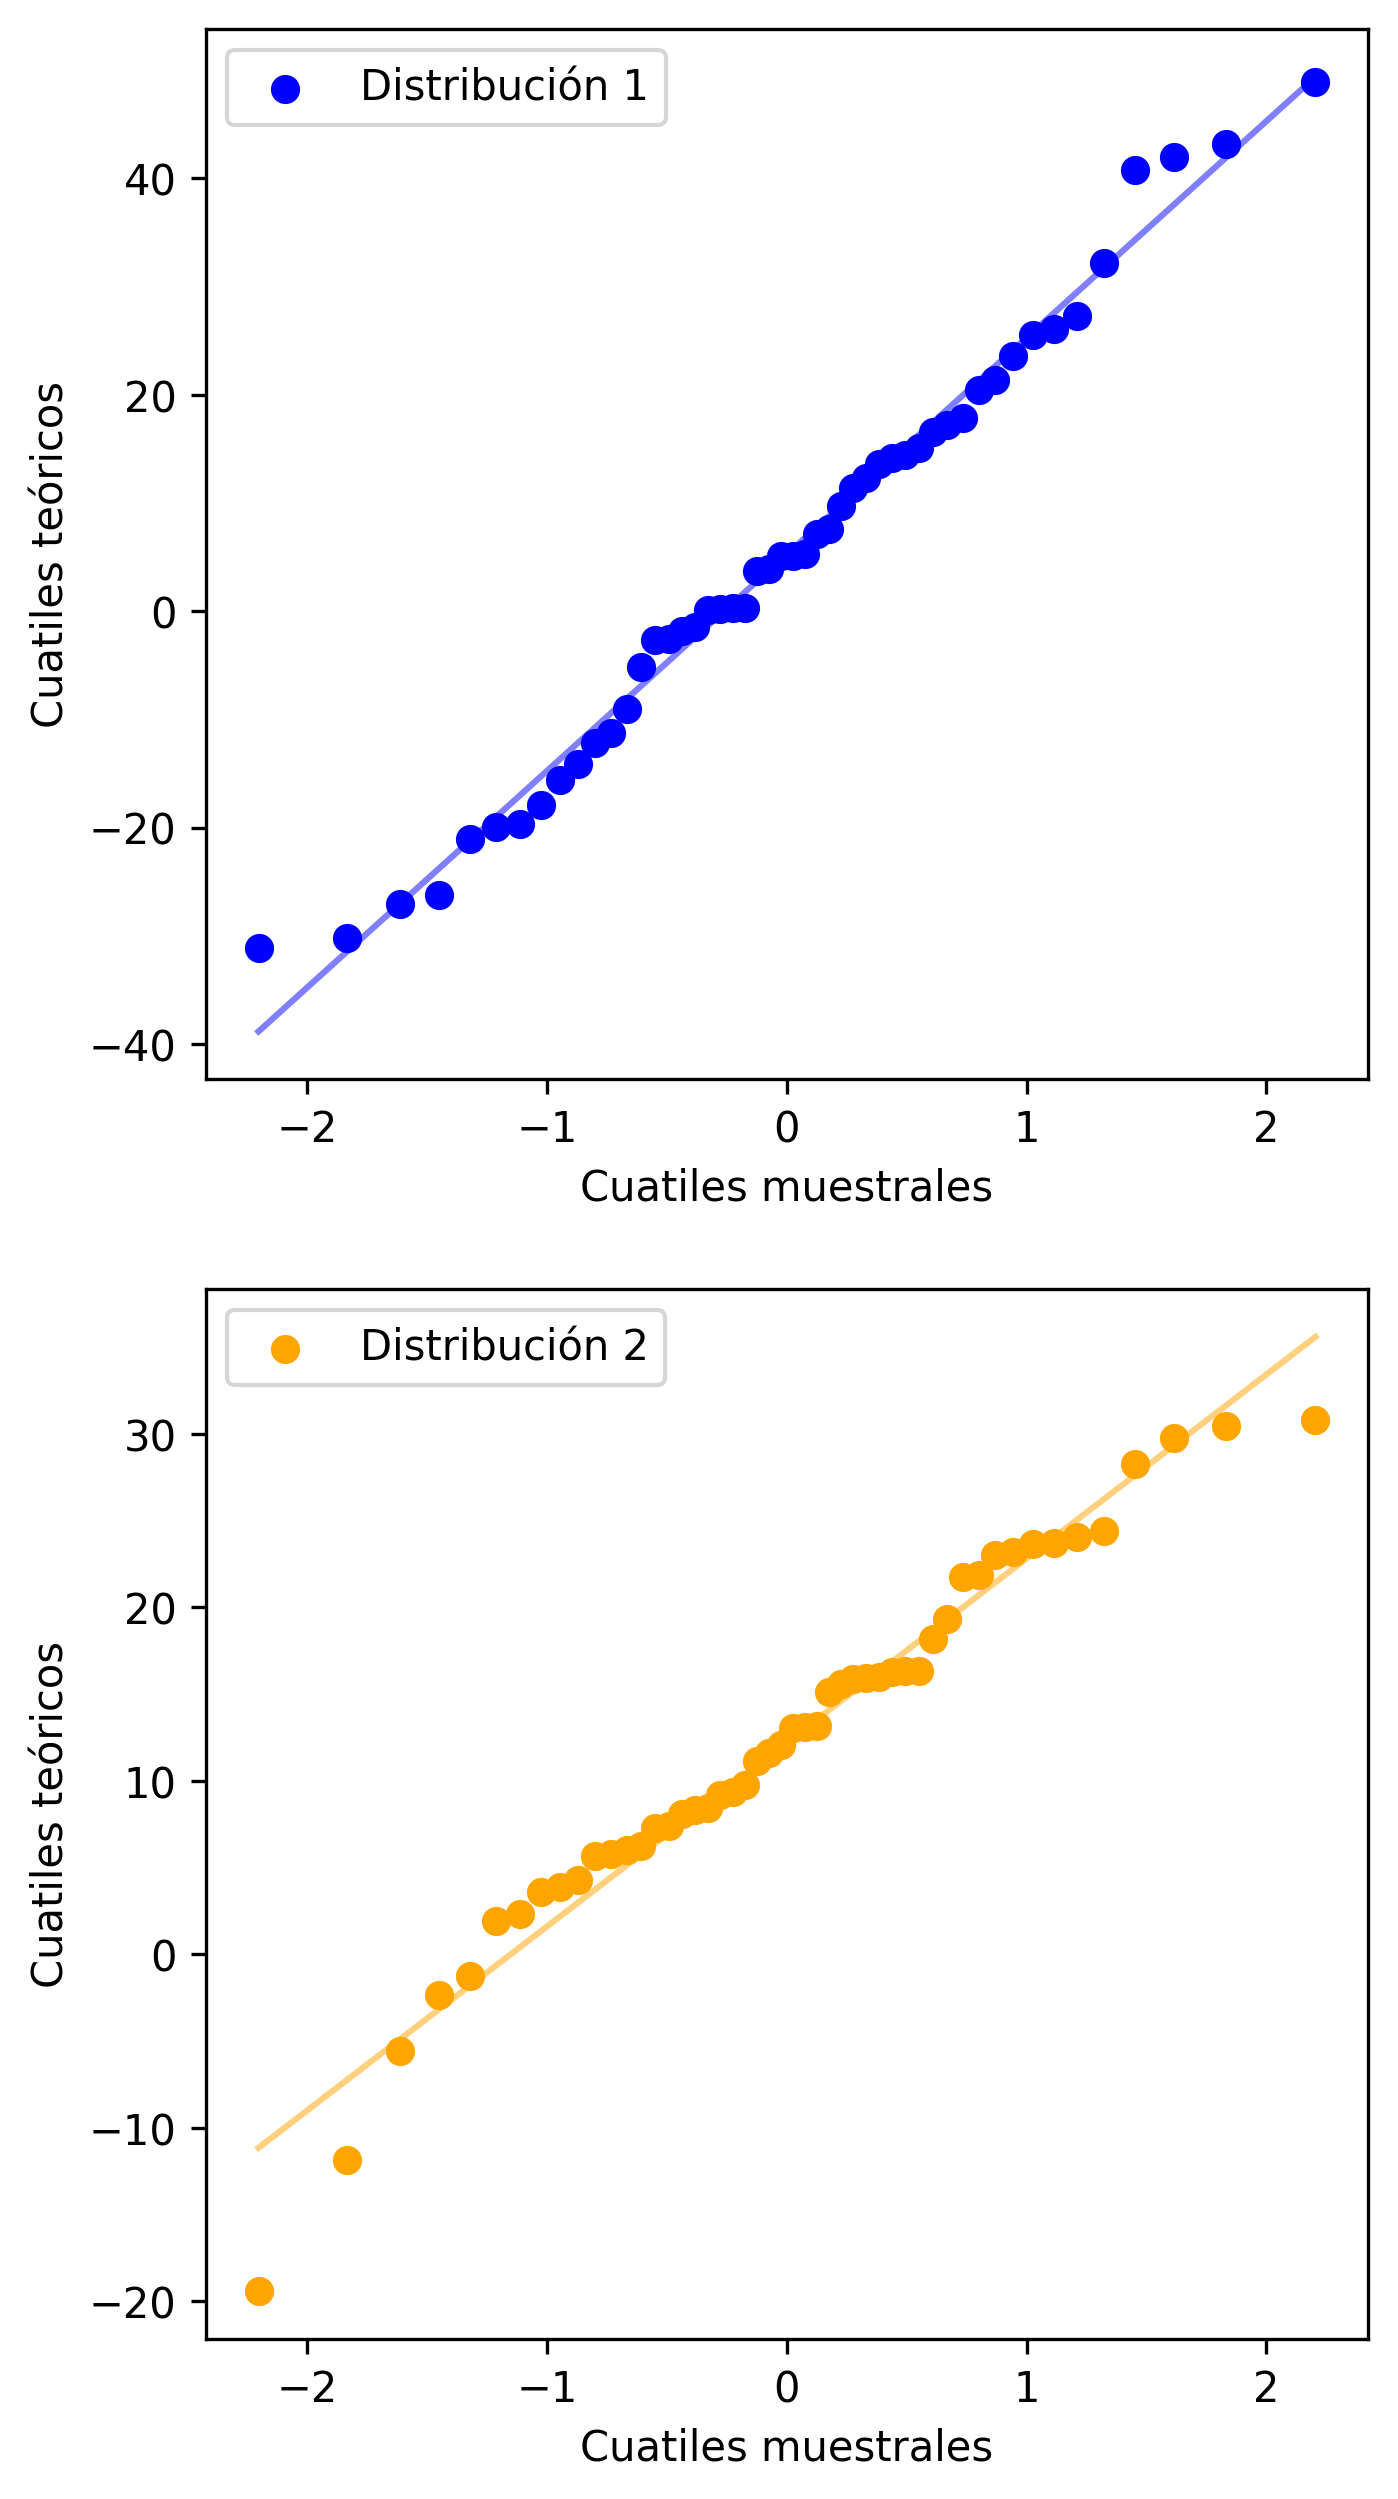

In [41]:
np.random.seed(42)
data1 = np.random.normal(loc = 10, scale = 21, size = 50)
data2 = np.random.normal(loc = 12, scale = 12, size = 50)

fig, ax = plt.subplots(dpi = 300)
sns.kdeplot(data1, ax=ax, label='Distribución 1', fill=True)
ax.axvline(x=10, color='blue', linestyle='--', label = 'Media Distribución 1')
ax.axvline(x=12, color='orange', linestyle='--', label = 'Media Distribución 2')
sns.kdeplot(data2, ax=ax, label='Distribución 2', fill=True)
ax.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots(2,1,dpi = 300, figsize = (5, 10))
(osm, osr), (slope, intercept, r) = st.probplot(data1)
ax[0].scatter(osm, osr, label = 'Distribución 1', color = 'blue')
ax[0].plot(osm, osm*slope + intercept, color = 'blue', alpha = 0.5)
ax[0].set_xlabel('Cuatiles muestrales')
ax[0].set_ylabel('Cuatiles teóricos')
(osm, osr), (slope, intercept, r) = st.probplot(data2)
ax[1].scatter(osm, osr, label = 'Distribución 2', color = 'orange')
ax[1].set_xlabel('Cuatiles muestrales')
ax[1].set_ylabel('Cuatiles teóricos')
ax[1].plot(osm, osm*slope + intercept, color = 'orange', alpha = 0.5)
ax[0].legend()
ax[1].legend()
plt.show()

### 1.

Plantee una hipótesis que le permita comparar la media de ambas poblaciones.
Asuma que ambos datos son independientes y provienen de una misma población con desviación estándar ($\sigma  = 15$).

---
Respuesta:

A sabiendas que siguen una distribución cercana a la normal, con desviación estándar conocida, e indenpendencia. Podemos aplicar un test z-test.

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 \neq \mu_2$



In [16]:
def ztest_course(dato1, dato2, pop_var1 = 1, pop_var2 = 1, significance = 0.05 ,alternative = 'two-sided'):
    '''
    Z-test para comparar dos poblaciones.
    Este test asume varianzas poblacionales conocidas, que las muestras son independientes
    y siguen una distribución normal.
    ---
    Parámetros:
        dato1 : array_like
            Primera muestra de datos.
        dato2 : array_like
            Segunda muestra de datos.
        pop_var1 : float, optional
            Varianza poblacional de la primera muestra. Por defecto es 1.
        pop_var2 : float, optional
            Varianza poblacional de la segunda muestra. Por defecto es 1.
        significance : float, optional
            Nivel de significancia para el test. Por defecto es 0.05.
        alternative : str, optional
            Tipo de test de hipótesis a realizar. Puede ser 'two-sided', 'larger' o 'smaller'.
            Por defecto es 'two-sided'.

    Retorna:
        z : float
            Valor del estadístico z.
        p_value : float
            Valor p del test.
    '''
    mean1 = np.mean(dato1)
    mean2 = np.mean(dato2)

    n1 = len(dato1)
    n2 = len(dato2)


    z = (mean1 - mean2)/ np.sqrt(pop_var1/n1 + pop_var2/n2)

    if alternative == 'two-sided':
        p_value = 2 * (1 - st.norm.cdf(np.abs(z)))
    elif alternative == 'larger':
        p_value = 1 - st.norm.cdf(z)
    elif alternative == 'smaller':
        p_value = st.norm.cdf(z)
    else:
        raise ValueError("El valor de 'alternative' debe ser 'two-sided', 'larger' o 'smaller'.")

    return z, p_value


In [33]:
z, p_value = ztest_course(data1, data2,
                          pop_var1 = 15, pop_var2 = 15,alternative='two-sided')
print(f'Valor del estadístico z: {z}')
print(f'Valor p del test: {p_value}') # sabemos que son no-iguales

Valor del estadístico z: 1.8021679692979877
Valor p del test: 0.07151898251795896


Sabiendo $\mu_1 \neq \mu_2$ aplicamos $\mu_1 >\mu_2$.

In [34]:
z, p_value = ztest_course(data1, data2,
                          pop_var1 = 15, pop_var2 = 15,alternative='larger')
print(f'Valor del estadístico z: {z}')
print(f'Valor p del test: {p_value}')

Valor del estadístico z: 1.8021679692979877
Valor p del test: 0.03575949125897948


Como p-value $> \alpha$ rechazamos la hipótesis alternaviva. Y probamos el otro caso $\mu_1 < \mu_2$.


In [30]:
z, p_value = ztest_course(data1, data2,
                          pop_var1 = 15, pop_var2 = 15, alternative='smaller')
print(f'Valor del estadístico z: {z}')
print(f'Valor p del test: {p_value}')

Valor del estadístico z: 1.8021679692979877
Valor p del test: 0.9642405087410205


Pero aquí hay algo raro. No cuadra con los datos que tenemos. Esto se debe a que la varianza poblacional es erronea.

In [49]:
z, p_val = ztest_course(data1, data2,
                        pop_var1 = 21, pop_var2 = 12, alternative='two-sided')
print('----two-sided----')
print(f'Valor del estadístico z: {z}')
print(f'Valor p del test: {p_val}')
z, p_val = ztest_course(data1, data2,
                        pop_var1 = 21, pop_var2 = 12, alternative='larger')
print('----one sided (>)----')
print(f'Valor del estadístico z: {z}')
print(f'Valor p del test: {p_val}')
z, p_val = ztest_course(data1, data2,
                        pop_var1 = 21, pop_var2 = 12, alternative='smaller')
print('----one sided (<)----')
print(f'Valor del estadístico z: {z}')
print(f'Valor p del test: {p_val}')


----two-sided----
Valor del estadístico z: -8.55279370913526
Valor p del test: 0.0
----one sided (>)----
Valor del estadístico z: -8.55279370913526
Valor p del test: 1.0
----one sided (<)----
Valor del estadístico z: -8.55279370913526
Valor p del test: 6.007225523178665e-18


### 2.
Realice un test bajo la misma hipótesis salvo que ahora usted no conoce la desviación estándar de la población.

---
Respuesta:

Bajo la misma hipótesis

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 < \mu_2$

Realizamos un test. En este caso, no conocemos la desviación estándar de la población, así que aproximamos mediante un t-test.

In [51]:
t_test = st.ttest_ind(data1, data2, equal_var=False, alternative= 'two-sided')
print(f'-----Two-sided-----')
print(f'Valor del estadístico t: {t_test.statistic}')
print(f'Valor p del test: {t_test.pvalue}')

print(f'-----One-sided (<)-----')
t_test = st.ttest_ind(data1, data2, equal_var=False, alternative= 'less')
print(f'Valor del estadístico t: {t_test.statistic}')
print(f'Valor p del test: {t_test.pvalue}')
t_test = st.ttest_ind(data1, data2, equal_var=False, alternative= 'greater')

print(f'-----One-sided (>)-----')
print(f'Valor del estadístico t: {t_test.statistic}')
print(f'Valor p del test: {t_test.pvalue}')



-----Two-sided-----
Valor del estadístico t: -2.209401913798394
Valor p del test: 0.030201896447310802
-----One-sided (<)-----
Valor del estadístico t: -2.209401913798394
Valor p del test: 0.015100948223655401
-----One-sided (>)-----
Valor del estadístico t: -2.209401913798394
Valor p del test: 0.9848990517763446


### 3.

Relajando aún más los supuestos, ahora los datos no son independientes. Realice un test de hipótesis respecto a la diferencia de estos datos.

---
Respuesta:

Bajo la misma hipótesis

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 < \mu_2$

Realizamos un test. En este caso, no conocemos la desviación estándar de la población, así que aproximamos mediante un t-test, salvo que en este caso utilizamos un t-test pareado.


In [52]:
t_pareado = st.ttest_rel(data1, data2, alternative='two-sided')
print(f'-----Two-sided-----')
print(f'Valor del estadístico t: {t_pareado.statistic}')
print(f'Valor p del test: {t_pareado.pvalue}')
t_pareado = st.ttest_rel(data1, data2, alternative='less')
print(f'-----One-sided (<)-----')
print(f'Valor del estadístico t: {t_pareado.statistic}')
print(f'Valor p del test: {t_pareado.pvalue}')
t_pareado = st.ttest_rel(data1, data2, alternative='greater')
print(f'-----One-sided (>)-----')
print(f'Valor del estadístico t: {t_pareado.statistic}')
print(f'Valor p del test: {t_pareado.pvalue}')

-----Two-sided-----
Valor del estadístico t: -2.3180934315879504
Valor p del test: 0.024661276697341104
-----One-sided (<)-----
Valor del estadístico t: -2.3180934315879504
Valor p del test: 0.012330638348670552
-----One-sided (>)-----
Valor del estadístico t: -2.3180934315879504
Valor p del test: 0.9876693616513295


## Datos 2



```
np.random.seed(42)
data1 = np.random.lognormal(size = 50)
data2 = np.random.laplace(size = 50)
```



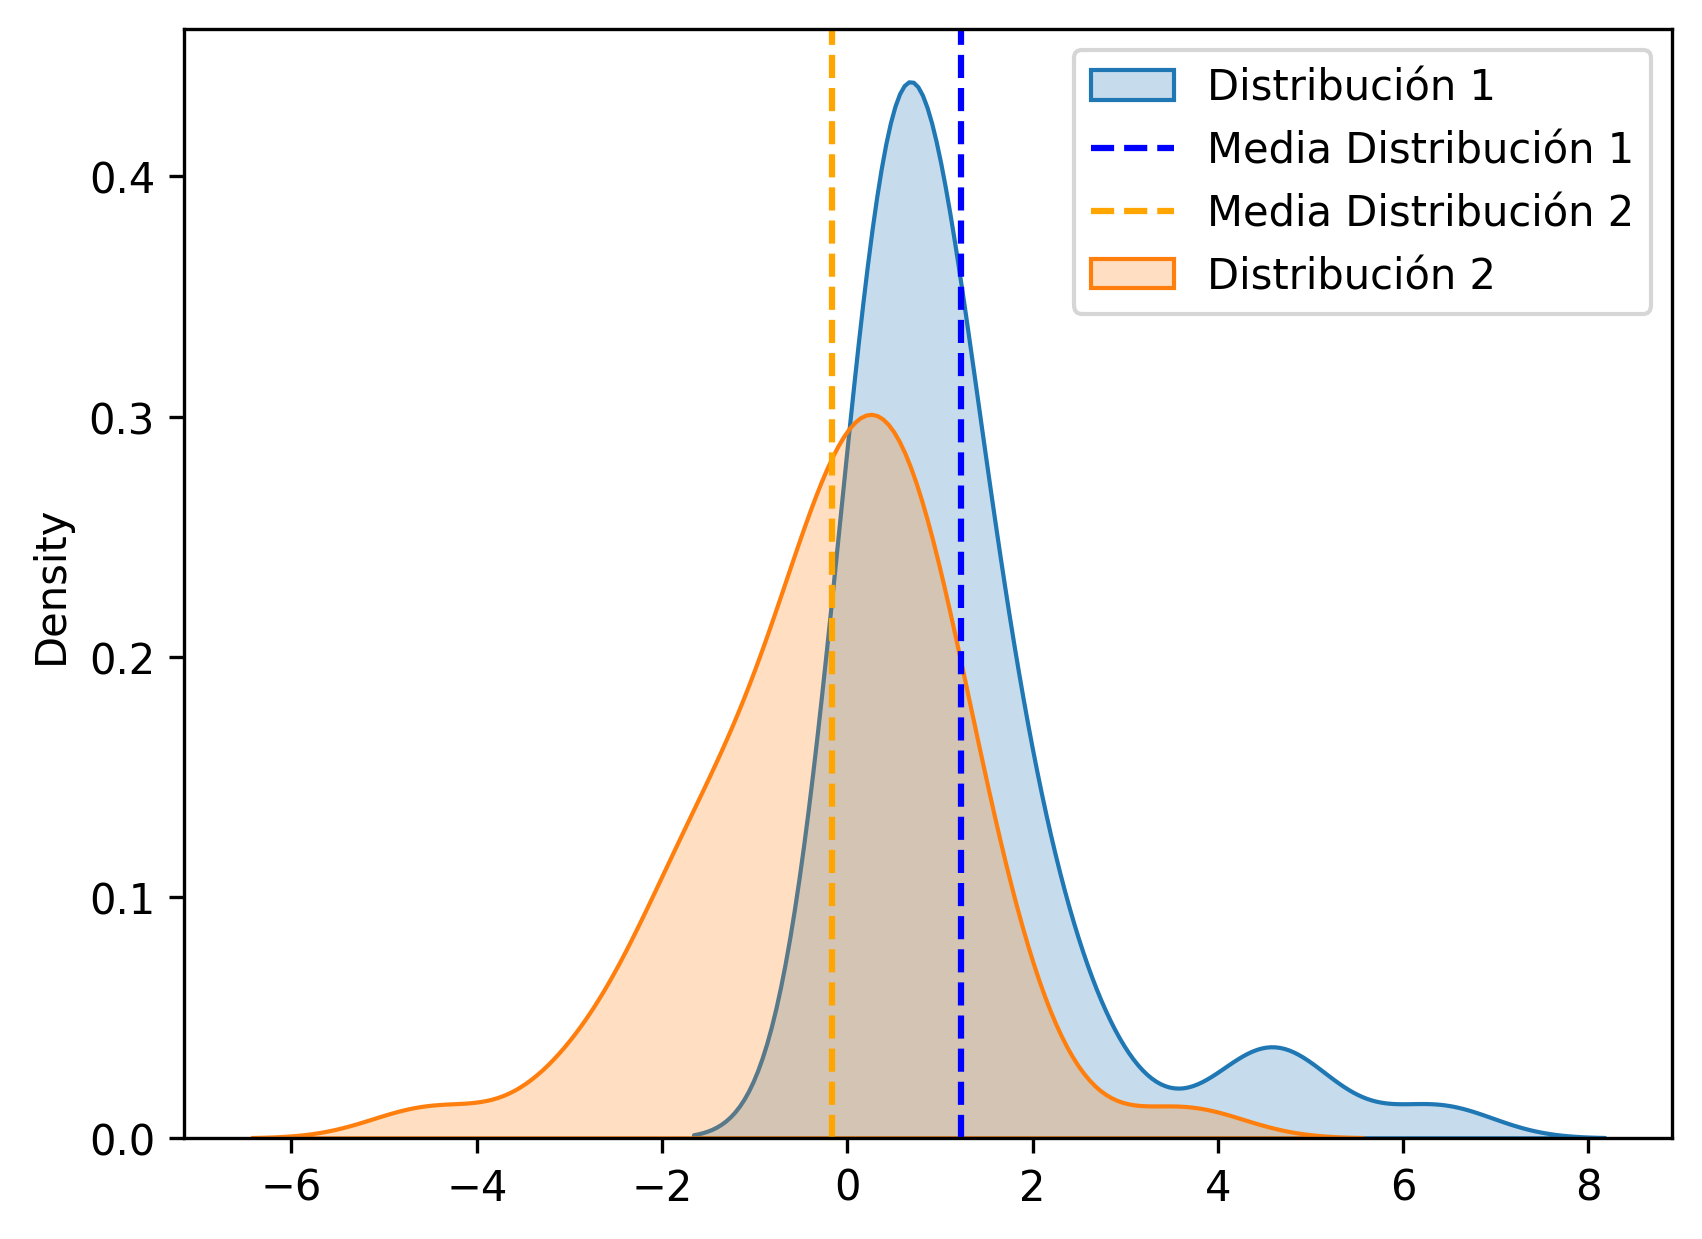

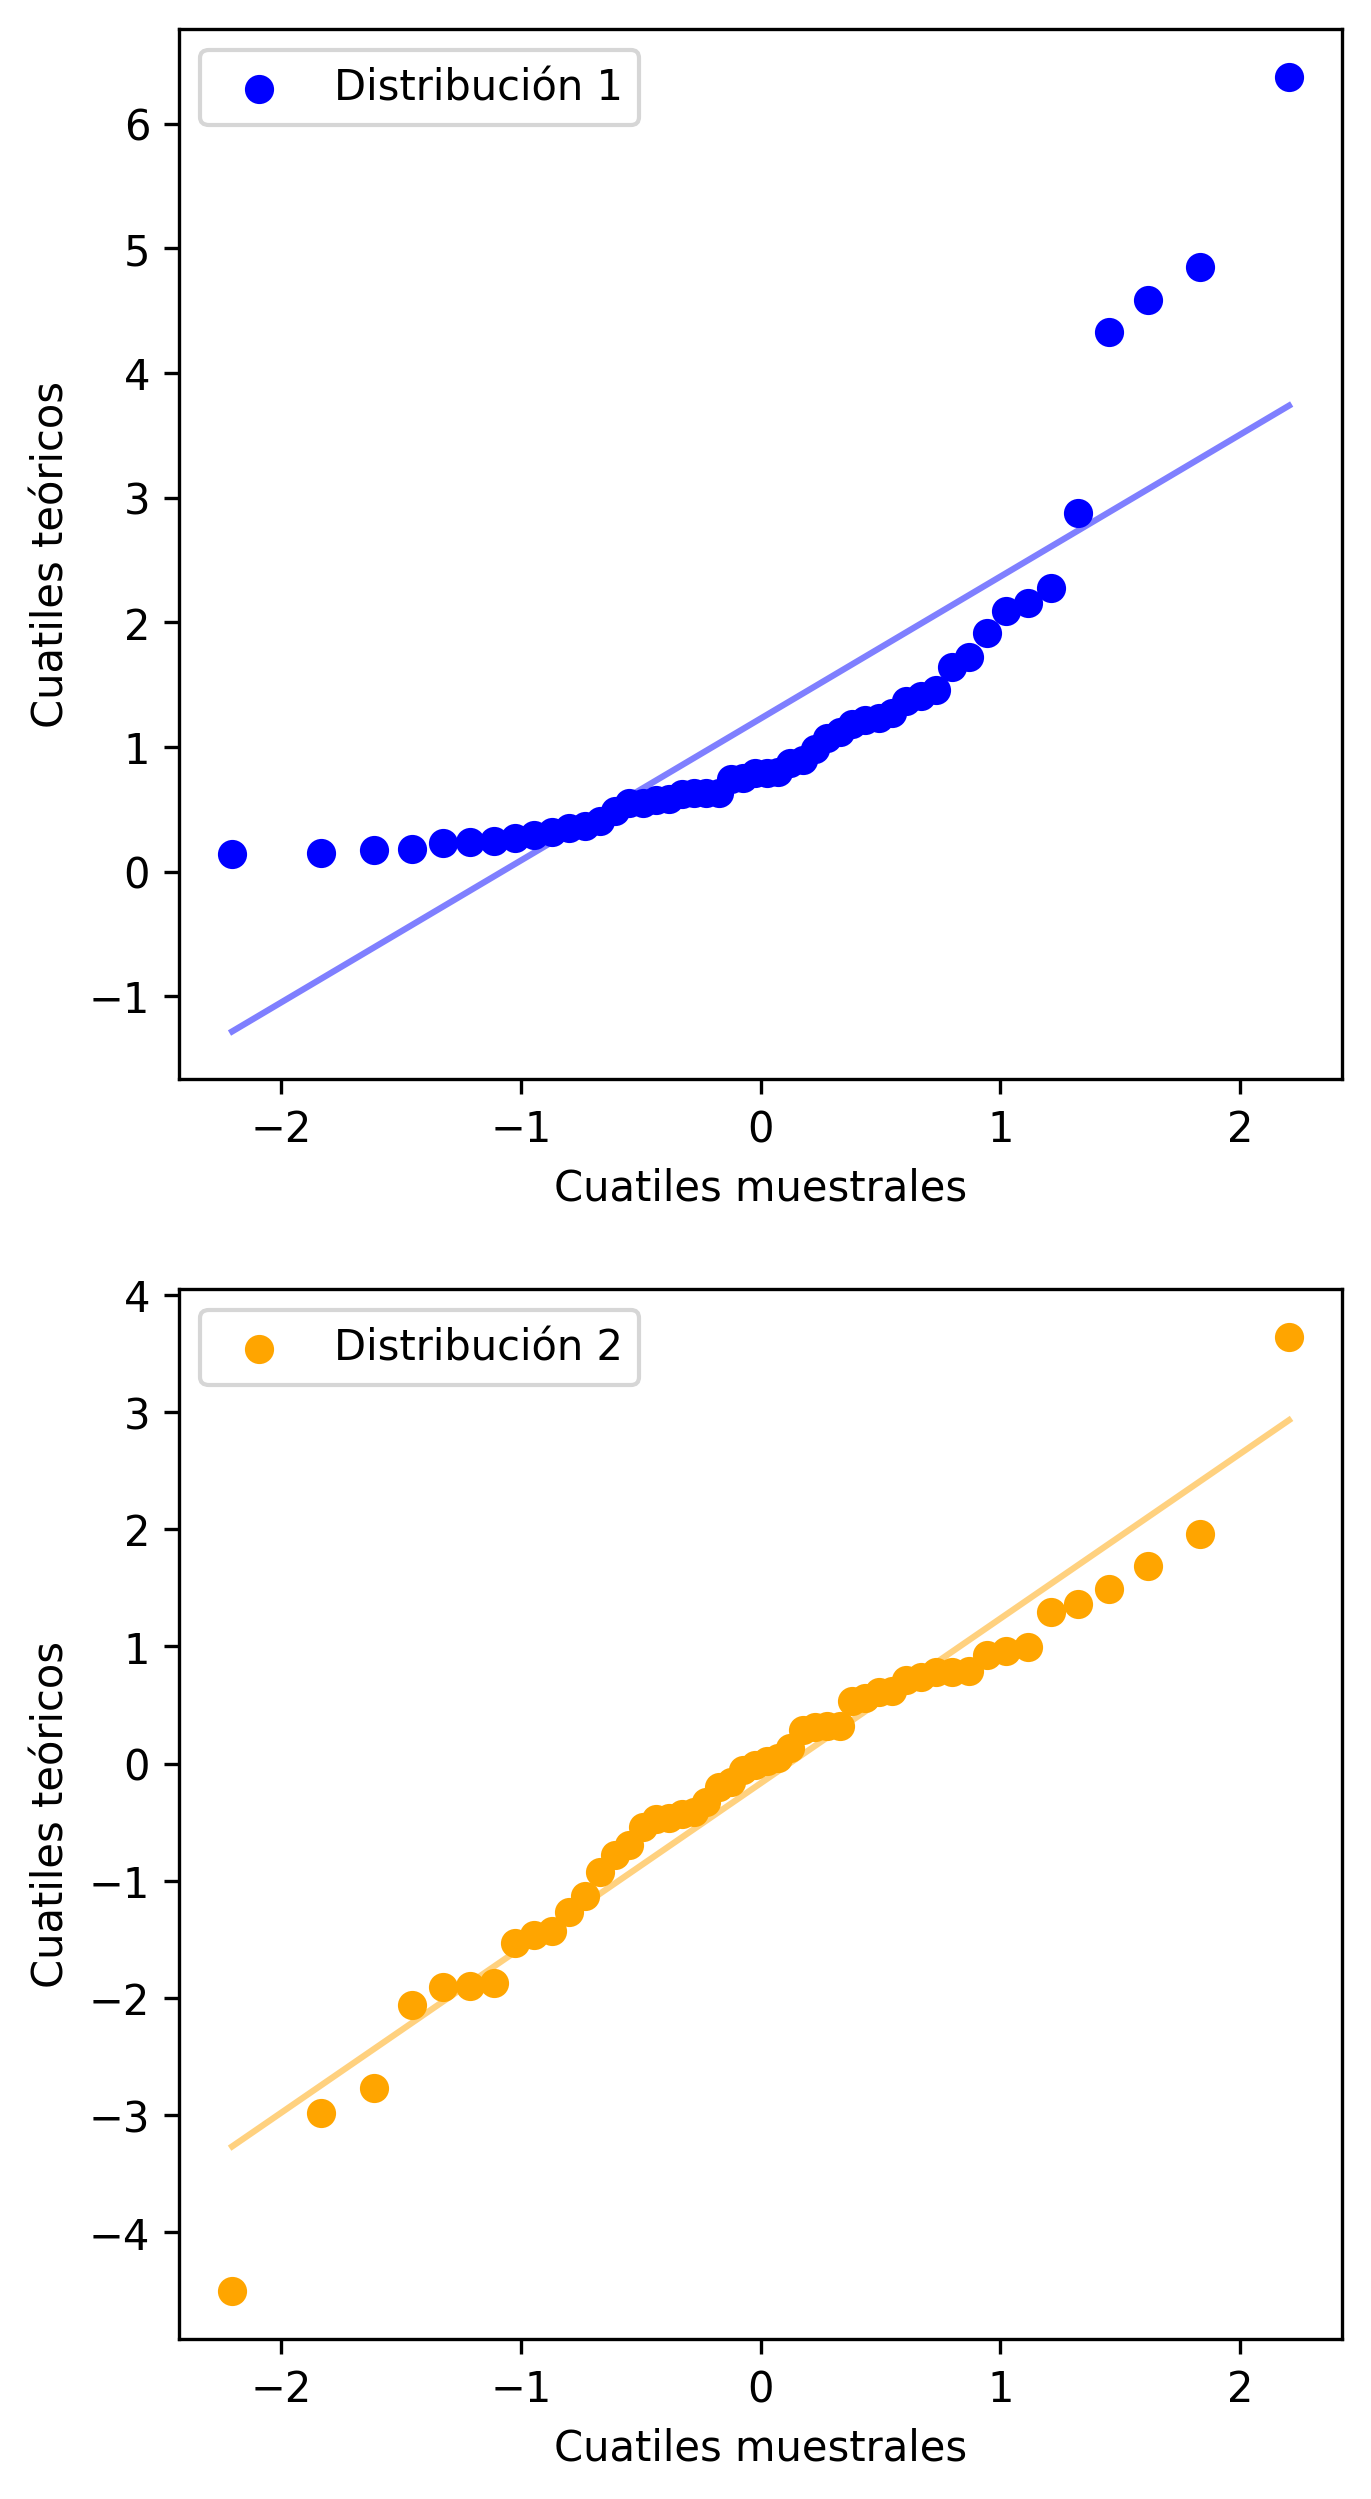

In [63]:
np.random.seed(42)
data1 = np.random.lognormal(size = 50)
data2 = np.random.laplace(size = 50)

fig, ax = plt.subplots(dpi = 300)
sns.kdeplot(data1, ax=ax, label='Distribución 1', fill=True)
mean1 = np.mean(data1)
ax.axvline(x=mean1, color='blue', linestyle='--', label = 'Media Distribución 1')
mean2 = np.mean(data2)
ax.axvline(x=mean2, color='orange', linestyle='--', label = 'Media Distribución 2')
sns.kdeplot(data2, ax=ax, label='Distribución 2', fill=True)
ax.legend(loc='upper right')
plt.show()


fig, ax = plt.subplots(2,1,dpi = 300, figsize = (5, 10))
(osm, osr), (slope, intercept, r) = st.probplot(data1)
ax[0].scatter(osm, osr, label = 'Distribución 1', color = 'blue')
ax[0].plot(osm, osm*slope + intercept, color = 'blue', alpha = 0.5)
ax[0].set_xlabel('Cuatiles muestrales')
ax[0].set_ylabel('Cuatiles teóricos')
(osm, osr), (slope, intercept, r) = st.probplot(data2)
ax[1].scatter(osm, osr, label = 'Distribución 2', color = 'orange')
ax[1].set_xlabel('Cuatiles muestrales')
ax[1].set_ylabel('Cuatiles teóricos')
ax[1].plot(osm, osm*slope + intercept, color = 'orange', alpha = 0.5)
ax[0].legend()
ax[1].legend()
plt.show()

### 1.
Realice un test para comparar ambas muestras tomando en cuenta que quiere saber cual posee una media -o equivalente- mayor. Asuma que son independientes.

---
Respuesta:

Al ser datos que difieren de una normal, se tiene que utilizar un test no-paramétrico. De esta forma realizamos un test no-paramétrico.
Debido a que asumimos independencia el test que debemos realizar es un test Mann-Whitney U test.

Planteamos la hipótesis

$$
H_0: \tilde{\mu_1} =   \tilde{\mu_2}
$$

$$
H_a: \tilde{\mu_1} \neq  \tilde{\mu_2}
$$


In [64]:

u, p_value = st.mannwhitneyu(data1, data2, alternative='two-sided')
print('----Two-sided----')
print(f'Valor del estadístico u: {u}')
print(f'Valor p del test: {p_value}')



----Two-sided----
Valor del estadístico u: 1954.0
Valor p del test: 1.2358459981312148e-06


Así, existe evidencia suficiente para rechazar la hipótesis nula. Verificamos alternativas one-side.

$$
H_0: \tilde{\mu_1} =  \tilde{\mu_2}
$$

$$
H_a: \tilde{\mu_1} >  \tilde{\mu_2}
$$

In [65]:
u, p_value = st.mannwhitneyu(data1, data2, alternative='greater')
print('----One-sided (>)----')
print(f'Valor del estadístico u: {u}')
print(f'Valor p del test: {p_value}')


----One-sided (>)----
Valor del estadístico u: 1954.0
Valor p del test: 6.179229990656074e-07


$$
H_0: \tilde{\mu_1} =  \tilde{\mu_2}
$$

$$
H_a: \tilde{\mu_1} <  \tilde{\mu_2}
$$

In [66]:
u, p_value = st.mannwhitneyu(data1, data2, alternative='less')
print('----One-sided (<)----')
print(f'Valor del estadístico u: {u}')
print(f'Valor p del test: {p_value}')

----One-sided (<)----
Valor del estadístico u: 1954.0
Valor p del test: 0.9999994031971636


Por lo cual podemos afirmar que existe evidencia para rechazar la hipótesis nula, y aceptar la hipótesis alternativa $H_a: \tilde{\mu_1} >  \tilde{\mu_2}$

### 2.

Realice el mismo procedimiento pero ahora suponiendo que ambos datos están relacionados.

---
Respuesta:

Dado a que ahora los datos están relacionados, es necesarioa aplicar un test wilcoxon, el cual es la versión no-paramétrica del test-t pareado.

$$
H_0: \tilde{\mu_1} =   \tilde{\mu_2}
$$

$$
H_a: \tilde{\mu_1} \neq  \tilde{\mu_2}
$$


In [71]:
stat, pval = st.wilcoxon(data1, data2, alternative='two-sided')
print('----Two-sided----')
print(f'Valor del estadístico de Wilcoxon: {stat}')
print(f'Valor p del test: {pval}')
stat, pval = st.wilcoxon(data1, data2, alternative='greater')
print('----One-sided (>)----')
print(f'Valor del estadístico de Wilcoxon: {stat}')
print(f'Valor p del test: {pval}')
stat, pval = st.wilcoxon(data1, data2, alternative='less')
print('----One-sided (<)----')
print(f'Valor del estadístico de Wilcoxon: {stat}')
print(f'Valor p del test: {pval}')

----Two-sided----
Valor del estadístico de Wilcoxon: 146.0
Valor p del test: 3.0412363649645613e-07
----One-sided (>)----
Valor del estadístico de Wilcoxon: 1129.0
Valor p del test: 1.5206181824822806e-07
----One-sided (<)----
Valor del estadístico de Wilcoxon: 1129.0
Valor p del test: 0.9999998580419627



$$
H_0: \tilde{\mu_1} = \tilde{\mu_2}
$$

$$
H_a: \tilde{\mu_1} >  \tilde{\mu_2}
$$


In [68]:
stat, pval = st.wilcoxon(data1, data2, alternative='greater')
print(f'Valor del estadístico de Wilcoxon: {stat}')
print(f'Valor p del test: {pval}')

Valor del estadístico de Wilcoxon: 1129.0
Valor p del test: 1.5206181824822806e-07



$$
H_0: \tilde{\mu_1} = \tilde{\mu_2}
$$

$$
H_a: \tilde{\mu_1} <  \tilde{\mu_2}
$$


In [69]:
stat, pval = st.wilcoxon(data1, data2, alternative='less')
print(f'Valor del estadístico de Wilcoxon: {stat}')
print(f'Valor p del test: {pval}')

Valor del estadístico de Wilcoxon: 1129.0
Valor p del test: 0.9999998580419627


Por lo cual nos quedamos, al igual que antes, con $H_a: \tilde{\mu_1} >  \tilde{\mu_2}$